# Predict Hotel Booking Cancellations

#### This notebook uses the *Hotel_Chain_C* dataset.

<div class="alert alert-block alert-info">

# Index
    
[1. Dataset Description](#1)<br>
    
[2. Import Libraries](#2)<br>

[3. Import Datasets](#3)<br>
    
[4. Exploratory Data Analysis](#4)<br>
- [4.1 Graphical Exploration](#4.1)
- [4.2 Correlation](#4.2)
- [4.3 Features Exploration](#4.3)
  
[5. Data Preparation](#5)<br>
- [5.1 Missing Values](#5.1)
- [5.2 Outliers](#5.2)
- [5.3 Feature Engineering](#5.3)
- [5.4 Drop Features](#5.4)
- [5.5 One Hot Encoding](#5.5)
    
[6. Modelling](#6)<br>
- [6.1 Logistic Regression](#6.1)
- [6.2 ADA Boost Classifier](#6.2)
- [6.3 XG Boost Classifier](#6.3)
- [6.4 Random Forest](#6.4)
- [6.5 Gradient Boosted Decision Tree](#6.5)
- [6.6 Support Vector Machine](#6.6)
- [6.7 Best Model Selection](#6.7)
    
[7. Results](#7)<br>

In the hotel industry, cancellations represent a revenue management challenge, as hotels find themselves at risk of having empty rooms when a customer cancels a reservation, in addition to the cost of honoring existing reservations. The problem has become more acute with the rise of "deal-hunting" customers, who make multiple reservations or continue to search for better deals, facilitated by online travel agencies. As a result, the cancellation rate has steadily increased, affecting the financial performance of hotels.
<br>
**Hotel chain C**, which operates resort and city hotels in Portugal, has tried to **reduce the impact of cancellations** and **improve revenue management** by developing predictive models to forecast net demand and identify reservations with a high probability of cancellation. The dataset provided is based on data from one of the chain's hotels (H2) for arrivals between July 1, 2015 and August 31, 2017.
This notebook aims to develop a predictive model to predict cancellations and reduce the cancellation rate from 42% to 20%.

<a class="anchor" id="1">

# 1. Dataset Description
    
</a>


The provided dataset is composed of the following columns:

Categorical Variables:

- **Agent:** ID of the travel agency that made the booking
- **ArrivalDateMonth:** Month of arrival date with 12 categories: “January” to “December”
- **AssignedRoomType:** Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons
- **Company:** ID of the company/entity that made the booking or is responsible for paying the booking. ID is presented instead of designation for anonymity reasons
- **Country:** Country of origin. Categories are represented in the ISO 3155-3:2013 format
- **CustomerType:** Type of booking, assuming one of four categories: 
    * *Contract* - when the booking has an allotment or other type of contract is associated to it;
    * *Group* – when the booking is associated to a group;
    * *Transient* – when the booking is not part of a group or contract, and is not associated to other transient booking;
    * *Transient-party* – when the booking is transient, but is associated to at least other transient booking
- **DepositType:** Indication if the customer made a deposit to guarantee the booking. This variable can assume three categories:
    * *No Deposit* – no deposit was made;
    * *Non Refund* – a deposit was made in the value of the total stay cost;
    * *Refundable* – a deposit was made with a value under the total cost of the stay.
- **DistributionChannel:** Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”
- **IsCanceled:** Value indicating if the booking was canceled (1) or not (0)
- **IsRepeatedGuest:** Value indicating if the booking name was from a repeated guest (1) or not (0)
- **MarketSegment:** Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”
- **Meal:** Type of meal booked. Categories are presented in standard hospitality meal packages:
    * *Undefined/SC* – no meal package;
    * *BB* – Bed & Breakfast;
    * *HB* – Half board (breakfast and one other meal – usually dinner); 
    * *FB* – Full board (breakfast, lunch and dinner)
- **ReservationStatus:** Reservation last status, assuming one of three categories: 
    * Canceled – booking was canceled by the customer;
    * *Check-Out*– customer has checked in but already departed;
    * *No-Show* – customer did not check-in and did inform the hotel of the reason why
- **ReservedRoomType:** Code of room type reserved. Code is presented instead of designation for anonymity reasons
<br>
<br>

Numerical Variables:
- **ADR:** Average Daily Rate
- **Adults:** Number of adults
- **ArrivalDateDayOfMonth:** Day of the month of the arrival date
- **ArrivalDateWeekNumber:** Week number of the arrival date 
- **ArrivalDateYear:** Year of the arrival date
- **Babies:** Number of babies
- **BookingChanges:** Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation
- **Children:** Number of children
- **DaysInWaitingList:** Number of days the booking was in the waiting list before it was confirmed to the customer
- **LeadTime:** Number of days that elapsed between the entering date of the booking into the PMS and the arrival date
- **PreviousBookingsNotCanceled:** Number of previous bookings not cancelled by the customer prior to the current booking
- **PreviousCancellations:** Number of previous bookings that were cancelled by the customer prior to the current booking
- **RequiredCarParkingSpaces:** Number of car parking spaces required by the customer
- **StaysInWeekendNights:** Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
- **StaysInWeekNights:** Number of weeknights (Monday to Friday) the guest stayed or booked to stay at the hotel
- **TotalOfSpecialRequests:** Number of special requests made by the customer (e.g. twin bed or high floor)
<br>
<br>

Date Variables:

- **ReservationStatusDate:** Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel

<a class="anchor" id="2">

# 2. Import Libraries
    
</a>

In [1]:
# Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
# Datasets
import holidays
import calendar

import collections

# Correlation
import scipy.stats as stats
from scipy.stats import chi2_contingency
from sklearn.linear_model import LassoCV

# Metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

#Normalisation
from sklearn.preprocessing import MinMaxScaler

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn import svm
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE

#Random forest
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier
from sklearn import svm
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score, RandomizedSearchCV, KFold, StratifiedKFold

#Result
import shap
from sklearn.inspection import PartialDependenceDisplay

<a class="anchor" id="3">

# 3. Import Dataset
    
</a>

### Hotel Dataset

In [2]:
# Load data  
dataset = pd.read_csv('Hotel_Chain_C.csv')
dataset.sample(10)

IsCanceled  LeadTime  ArrivalDateYear ArrivalDateMonth  \
7588            1         1             2016         February   
9597            1       275             2016            April   
62660           0        24             2016         December   
7561            1       116             2016         February   
38609           1         6             2015          October   
31280           1       134             2017             July   
40201           0        10             2016         February   
12300           1       275             2016             June   
22598           1        54             2017          January   
24302           1        91             2017            March   

       ArrivalDateWeekNumber  ArrivalDateDayOfMonth  StaysInWeekendNights  \
7588                      10                     28                     2   
9597                      17                     17                     2   
62660                     49                      2                     1   
7561                      10                     28                     2   
38609                     43                     19                     1   
31280                     27                      3                     1   
40201                      6                      4                     0   
12300                     23                      4                     1   
22598                      3                     18                     0   
24302                     10                      7                     0   

       StaysInWeekNights  Adults  Children  ...      DepositType        Agent  \
7588                   1       1       0.0  ...  No Deposit               134   
9597                   0       2       0.0  ...  Non Refund                12   
62660                  2       2       0.0  ...  No Deposit                28   
7561                   1       1       0.0  ...  No Deposit               134   
38609                  3       2       0.0  ...  No Deposit                10   
31280                  0       2       0.0  ...  No Deposit                 9   
40201                  1       1       0.0  ...  No Deposit              NULL   
12300                  1       2       0.0  ...  Non Refund                 5   
22598                  3       2       0.0  ...  Non Refund               171   
24302                  4       2       0.0  ...  No Deposit                 9   

           Company DaysInWaitingList     CustomerType    ADR  \
7588          NULL                 0  Transient-Party   60.0   
9597          NULL                 0        Transient  110.0   
62660         NULL                 0        Transient   80.0   
7561          NULL                 0  Transient-Party   61.0   
38609         NULL                 0        Transient  114.0   
31280         NULL                 0        Transient  107.1   
40201           40                 0  Transient-Party   66.0   
12300         NULL                69        Transient   62.8   
22598         NULL                 0        Transient   65.0   
24302         NULL                 0        Transient   74.8   

       RequiredCarParkingSpaces  TotalOfSpecialRequests ReservationStatus  \
7588                          0                       0          Canceled   
9597                          0                       0          Canceled   
62660                         0                       0         Check-Out   
7561                          0                       0           No-Show   
38609                         0                       0          Canceled   
31280                         0                       0          Canceled   
40201                         0                       0         Check-Out   
12300                         0                       0          Canceled   
22598                         0                       0          Canceled   
24302                         0                       1          Canceled   

### Holiday Dataset

In [3]:
# Import the holidays from the function holidays
pt_holidays = holidays.Portugal(subdiv='Ext') 

In [4]:
# In order to check if the customer reserved a room during an holiday we created first the feature ArrivalDate
dataset['ArrivalDate'] = pd.to_datetime(dataset['ArrivalDateDayOfMonth'].astype(str) + '-' + dataset['ArrivalDateMonth'] + '-' + dataset['ArrivalDateYear'].astype(str), dayfirst=True, errors='coerce')

# Calculate the number of bookings for each date and create a new feature 'BookingsPerDate'
dataset['BookingsPerDate'] = dataset['ArrivalDate'].map(dataset['ArrivalDate'].value_counts())

In [5]:
# Create the function to check if the customers will stay in the hotel during an holiday (at least one day of holiday in all their stay)
# First make sure the arrival date is in a datetime format
dataset['ArrivalDate'] = pd.to_datetime(dataset['ArrivalDate'])
#Function to check if the stay in the hotel has 1 or more holidays in
def check_holidays(row):
    arrival_date = row['ArrivalDate']
    stay_duration = row['BookingsPerDate']
    stay_dates = pd.date_range(start=arrival_date, periods=stay_duration)
    
    for date in stay_dates:
        if date in pt_holidays:
            return 1  # At least one holiday found
    
    return 0  # No holidays found
# Creation of the new feature
dataset['IsPortugueseHoliday'] = dataset.apply(check_holidays, axis=1).astype(int)
dataset['IsPortugueseHoliday'].sum()

76904

In [6]:
#Create a new feature to check if the arrival date is an holiday (Portugese holiday)
def check_if_holiday(date):
    if date in pt_holidays:
        return 1  # Arrival date is a holiday
    else:
        return 0  # Arrival date is not a holiday

dataset['IsPortugueseHolidayArrival'] = dataset['ArrivalDate'].apply(check_if_holiday)
dataset['IsPortugueseHolidayArrival'].sum()

3436

### Weather Dataset

In [7]:
# Load data for the weather from 2015 until 2017 in Lisbon
weather = pd.read_excel('Weather.xlsx')
weather.sample(10)

Date  Year Weather
903  2017-06-22  2017       S
928  2017-07-17  2017       S
676  2016-11-07  2016       S
700  2016-12-01  2016       R
166  2015-06-16  2015       S
209  2015-07-29  2015       C
323  2015-11-20  2015       S
593  2016-08-16  2016       S
94   2015-04-05  2015       S
1091 2017-12-27  2017       C

In [8]:
#Create the new feature weather that is S=sunny, R=rainy, C=cloudy
#1st make sure that the type for ArrivalDate and Date is the same (datetime) 
weather['Date'] = pd.to_datetime(weather['Date'])
#Merge now the 2 datasets and keep only the column "Weather"
dataset = dataset.merge(weather[['Date', 'Weather']], how='left', left_on='ArrivalDate', right_on='Date').drop('Date', axis=1)
dataset.head()

IsCanceled  LeadTime  ArrivalDateYear ArrivalDateMonth  \
0           0         6             2015             July   
1           1        88             2015             July   
2           1        65             2015             July   
3           1        92             2015             July   
4           1       100             2015             July   

   ArrivalDateWeekNumber  ArrivalDateDayOfMonth  StaysInWeekendNights  \
0                     27                      1                     0   
1                     27                      1                     0   
2                     27                      1                     0   
3                     27                      1                     2   
4                     27                      2                     0   

   StaysInWeekNights  Adults  Children  ...   ADR RequiredCarParkingSpaces  \
0                  2       1       0.0  ...   0.0                        0   
1                  4       2       0.0  ...  76.5                        0   
2                  4       1       0.0  ...  68.0                        0   
3                  4       2       0.0  ...  76.5                        0   
4                  2       2       0.0  ...  76.5                        0   

  TotalOfSpecialRequests ReservationStatus ReservationStatusDate  ArrivalDate  \
0                      0         Check-Out            2015-07-03   2015-07-01   
1                      1          Canceled            2015-07-01   2015-07-01   
2                      1          Canceled            2015-04-30   2015-07-01   
3                      2          Canceled            2015-06-23   2015-07-01   
4                      1          Canceled            2015-04-02   2015-07-02   

   BookingsPerDate  IsPortugueseHoliday IsPortugueseHolidayArrival Weather  
0               79                    1                          0       C  
1               79                    1                          0       C  
2               79                    1                          0       C  
3               79                    1                          0       C  
4               49                    1                          0       S  

[5 rows x 36 columns]

<a class="anchor" id="4">

# 4. Exploratory Data Analysis
    
</a>

In [9]:
# Check the shape
dataset.shape

(79330, 36)

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79330 entries, 0 to 79329
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   IsCanceled                   79330 non-null  int64         
 1   LeadTime                     79330 non-null  int64         
 2   ArrivalDateYear              79330 non-null  int64         
 3   ArrivalDateMonth             79330 non-null  object        
 4   ArrivalDateWeekNumber        79330 non-null  int64         
 5   ArrivalDateDayOfMonth        79330 non-null  int64         
 6   StaysInWeekendNights         79330 non-null  int64         
 7   StaysInWeekNights            79330 non-null  int64         
 8   Adults                       79330 non-null  int64         
 9   Children                     79326 non-null  float64       
 10  Babies                       79330 non-null  int64         
 11  Meal                         79330 non-nu

In [11]:
dataset.describe(include='all').T

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.


count unique                  top   freq  \
IsCanceled                   79330.0    NaN                  NaN    NaN   
LeadTime                     79330.0    NaN                  NaN    NaN   
ArrivalDateYear              79330.0    NaN                  NaN    NaN   
ArrivalDateMonth               79330     12               August   8983   
ArrivalDateWeekNumber        79330.0    NaN                  NaN    NaN   
ArrivalDateDayOfMonth        79330.0    NaN                  NaN    NaN   
StaysInWeekendNights         79330.0    NaN                  NaN    NaN   
StaysInWeekNights            79330.0    NaN                  NaN    NaN   
Adults                       79330.0    NaN                  NaN    NaN   
Children                     79326.0    NaN                  NaN    NaN   
Babies                       79330.0    NaN                  NaN    NaN   
Meal                           79330      4            BB         62305   
Country                        79306    166                  PRT  30960   
MarketSegment                  79330      8            Online TA  38748   
DistributionChannel            79330      5                TA/TO  68945   
IsRepeatedGuest              79330.0    NaN                  NaN    NaN   
PreviousCancellations        79330.0    NaN                  NaN    NaN   
PreviousBookingsNotCanceled  79330.0    NaN                  NaN    NaN   
ReservedRoomType               79330      8     A                 62595   
AssignedRoomType               79330      9     A                 57007   
BookingChanges               79330.0    NaN                  NaN    NaN   
DepositType                    79330      3      No Deposit       66442   
Agent                          79330    224                    9  31955   
Company                        79330    208                 NULL  75641   
DaysInWaitingList            79330.0    NaN                  NaN    NaN   
CustomerType                   79330      4            Transient  59404   
ADR                          79330.0    NaN                  NaN    NaN   
RequiredCarParkingSpaces     79330.0    NaN                  NaN    NaN   
TotalOfSpecialRequests       79330.0    NaN                  NaN    NaN   
ReservationStatus              79330      3            Check-Out  46228   
ReservationStatusDate          79330    864           2015-10-21   1416   
ArrivalDate                    79330    793  2015-10-16 00:00:00    340   
BookingsPerDate              79330.0    NaN                  NaN    NaN   
IsPortugueseHoliday          79330.0    NaN                  NaN    NaN   
IsPortugueseHolidayArrival   79330.0    NaN                  NaN    NaN   
Weather                        79330      3                    S  36909   

                                 first       last         mean         std  \
IsCanceled                         NaT        NaT      0.41727    0.493111   
LeadTime                           NaT        NaT   109.735724  110.948526   
ArrivalDateYear                    NaT        NaT  2016.174285    0.699181   
ArrivalDateMonth                   NaT        NaT          NaN         NaN   
ArrivalDateWeekNumber              NaT        NaT    27.177449   13.398523   
ArrivalDateDayOfMonth              NaT        NaT    15.786625    8.728451   
StaysInWeekendNights               NaT        NaT     0.795185    0.885026   
StaysInWeekNights                  NaT        NaT     2.182957    1.456416   
Adults                             NaT        NaT     1.850977    0.509292   
Children                           NaT        NaT      0.09137    0.372177   
Babies                             NaT        NaT     0.004941    0.084323   
Meal                               NaT        NaT          NaN         NaN   
Country                            NaT        NaT          NaN         NaN   
MarketSegment                      NaT        NaT          NaN         NaN   
DistributionChannel                NaT        NaT          NaN         NaN   
IsRepea

First impressions:
- the 50% of the booking is cancelled
- Leadtime: on average, customers book 109 days in advance. The minimum is 0 (same day) and the biggest value is 629 (1.7 years before).
- ArrivalDateYear: as anticièpated, the oldest record is from 2015 while the most recent is from 2017.
- ArrivalDateMonth: the month with more booking is August.
- ArrivalDateDayOfMonth: bookings seem evenly distributed throughout the month, with no obvious peeks for the time being.
- StaysInWeekendNights: maximum number is 16.
- StaysInWeekNights: on average is 2 but the maximum number is 41. Could it be a company that made a reservation for several rooms due to conference and that they are all registered with this account?
- the biggest value for babies is 10
- Meal: the majority of type of meal booked is BB (Bed & Breakfast).
- PreviousCancellations: the max number is 21.

In [12]:
# Check missing values
dataset.isna().sum()

IsCanceled                      0
LeadTime                        0
ArrivalDateYear                 0
ArrivalDateMonth                0
ArrivalDateWeekNumber           0
ArrivalDateDayOfMonth           0
StaysInWeekendNights            0
StaysInWeekNights               0
Adults                          0
Children                        4
Babies                          0
Meal                            0
Country                        24
MarketSegment                   0
DistributionChannel             0
IsRepeatedGuest                 0
PreviousCancellations           0
PreviousBookingsNotCanceled     0
ReservedRoomType                0
AssignedRoomType                0
BookingChanges                  0
DepositType                     0
Agent                           0
Company                         0
DaysInWaitingList               0
CustomerType                    0
ADR                             0
RequiredCarParkingSpaces        0
TotalOfSpecialRequests          0
ReservationSta

We only have missing value for:
- Children: 4
- Country: 24

<a class="anchor" id="4.1">

## 4.1 Graphical Exploration
    
</a>

In [13]:
# Number of unique company that made a booking
len(np.unique(dataset['Company']))

208

In [14]:
# define numerical variables
numerical = ['ADR', 'Adults', 'Babies','BookingChanges', 'Children', 'DaysInWaitingList', 'LeadTime', 'PreviousBookingsNotCanceled', 
             'PreviousCancellations', 'RequiredCarParkingSpaces', 'StaysInWeekendNights', 'StaysInWeekNights', 
             'TotalOfSpecialRequests','ArrivalDateDayOfMonth', 'ArrivalDateWeekNumber', 'ArrivalDateYear']


#define categorical variables
categorical = ['Agent', 'ArrivalDateMonth', 'AssignedRoomType', 'Company' , 'Country', 'CustomerType', 'DepositType' , 
               'DistributionChannel', 'IsCanceled', 'IsRepeatedGuest', 'MarketSegment', 'Meal', 'ReservationStatus', 
               'ReservedRoomType', 'BookingsPerDate','IsPortugueseHoliday','IsPortugueseHolidayArrival', 'Weather']

#time-based features
timebased = ['ArrivalDate', 'ReservationStatusDate']

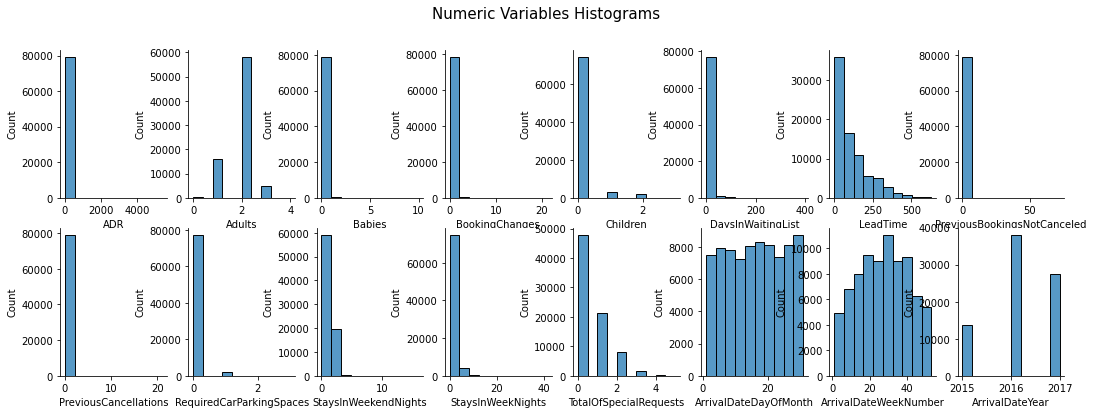

In [15]:
# HISTOGRAM (ALL NUMERIC VARIABLES)

fig, ax = plt.subplots(2, 8, figsize=(18,6))
for var, subplot in zip(dataset[numerical], ax.flatten()):
    g = sns.histplot(data=dataset,bins=10,x=var,ax=subplot,kde=False)

sns.despine()
plt.rc('axes', labelsize=10)
fig.suptitle("Numeric Variables Histograms", fontsize=15);

Text(0.5, 0.98, 'Numeric Variables Histograms')

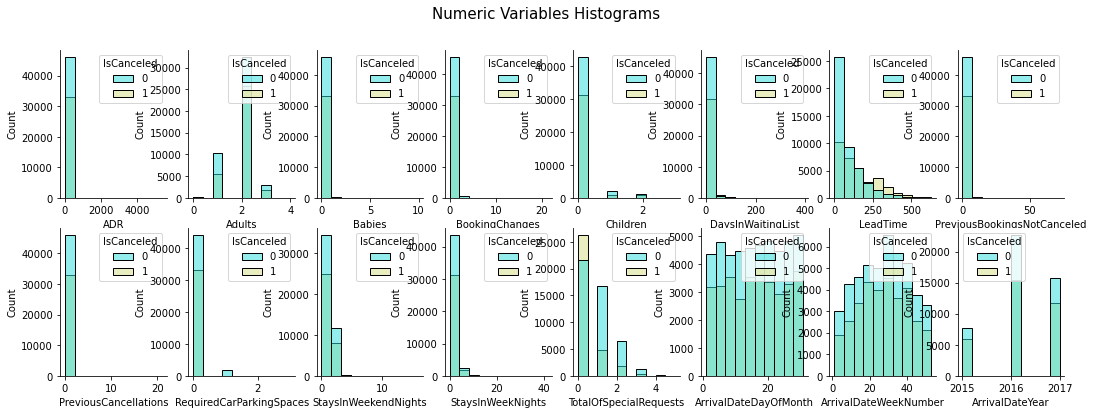

In [16]:
fig, ax = plt.subplots(2, 8, figsize=(18, 6))
for var, subplot in zip(dataset[numerical], ax.flatten()):
    g = sns.histplot(data=dataset, bins=10, x=var, hue='IsCanceled', ax=subplot, palette='rainbow', kde=False)

sns.despine()
plt.rc('axes', labelsize=10)
fig.suptitle("Numeric Variables Histograms", fontsize=15)

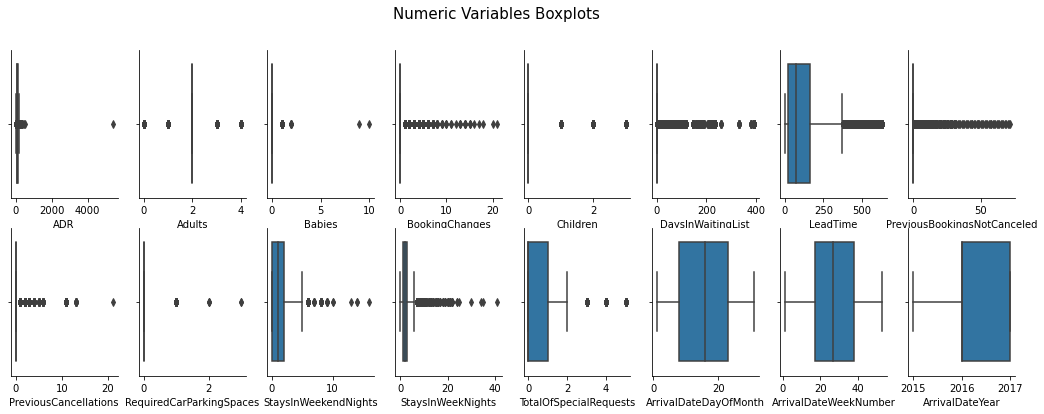

In [17]:
# BOXPLOT ( NUMERIC VARIABLES)

fig, ax = plt.subplots(2, 8, figsize=(18,6))
for var, subplot in zip(dataset[numerical], ax.flatten()):
    g = sns.boxplot(data=dataset,x=var,ax=subplot)

sns.despine()
plt.rc('axes', labelsize=10)
fig.suptitle("Numeric Variables Boxplots", fontsize=15);

The features containing outliers are possibly ADR, Babies, BookungChanges, DaysInWaitinglist, PreviousBookingNotCanceled and PReviousCancellation, StaysinweekendNights and StaysWekendNights

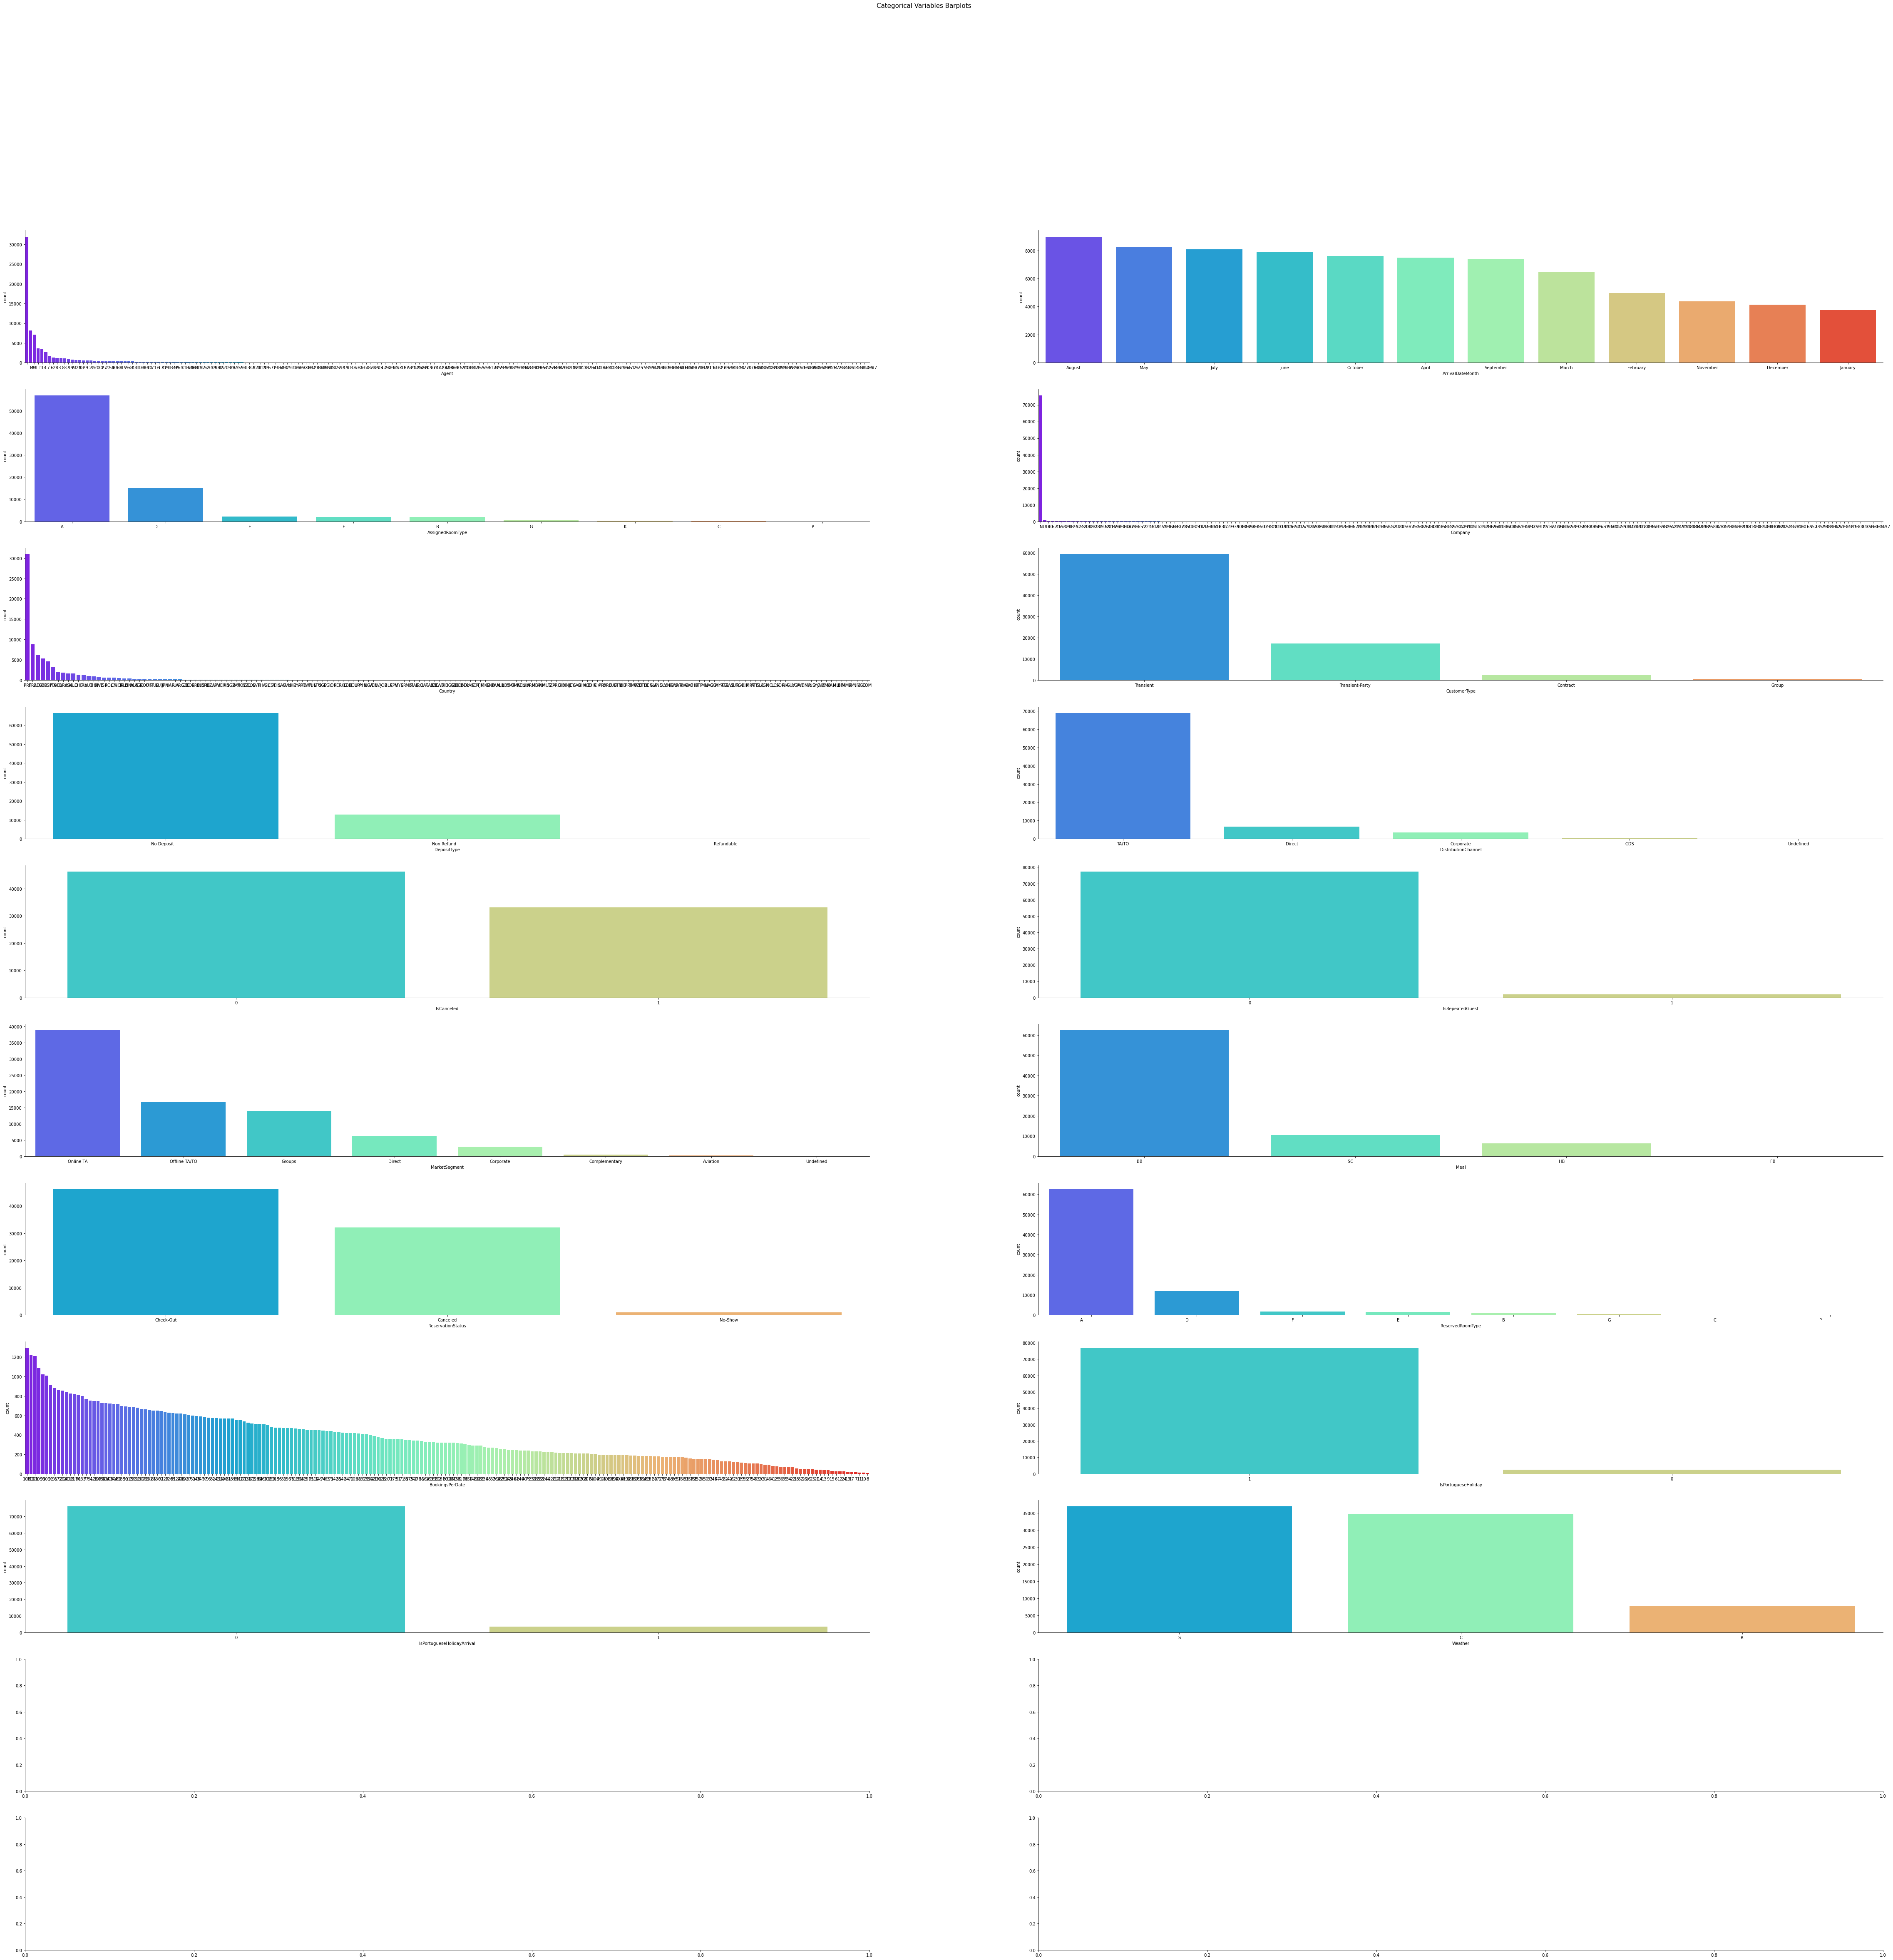

In [18]:
# BARPLOTS (CATEGORICAL VARIABLES)

# Draw
fig, ax = plt.subplots(11, 2, figsize=(80,76))
for var, subplot in zip(dataset[categorical], ax.flatten()):
    g = sns.countplot(x=var ,data=dataset, order=dataset[var].value_counts().index,palette='rainbow' ,ax=subplot)

# Decoration
sns.despine()
plt.rc('axes', labelsize=10)
fig.suptitle("Categorical Variables Barplots", fontsize=15);

<a class="anchor" id="4.2">

## 4.2 Correlation
    
</a>

### Correlation Matrix

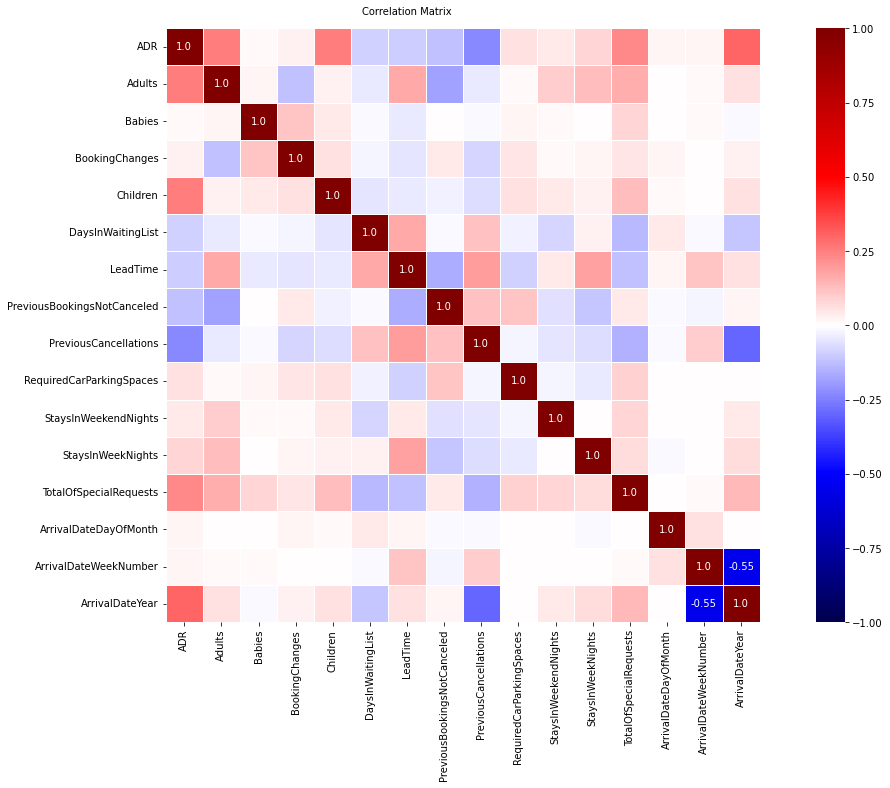

In [19]:
fig = plt.figure(figsize = (20, 10))
corr = np.round(dataset[numerical].corr(method='spearman'),2)
mask_annot = np.absolute(corr.values) >= 0.5
annot = np.where(mask_annot, corr.values, np.full(corr.shape,""))
sns.heatmap(data = corr, annot = annot, cmap = plt.cm.seismic, fmt = 's', vmin = -1, vmax = 1, center = 0, square = True, 
             linewidths = 0.5)
fig.subplots_adjust(top = 0.95)
fig.suptitle("Correlation Matrix", fontsize = 10)
plt.show()

Notes:
- ADR positive correlated with Adults, Children, TotalOfSPecialRequests and negative correlated with Previous Cancellation
- Babies looks like the features less correlated, only with BookingChanges and TotalOfSPecialRequests

### Chi-Square Test For Categorical Variables

In [20]:
# Create a dataset with only categorical variables
categorical_data = dataset[categorical]

# Set the critical value
alpha = 0.05

# Calculate the chi-square test for each pair of variables
results = {}
for var1 in categorical:
    for var2 in categorical:
        if var1 != var2:
            contingency_table = pd.crosstab(categorical_data[var1], categorical_data[var2])
            chi2, p_value, _, _ = chi2_contingency(contingency_table)
            if p_value < alpha:
                results[(var1, var2)] = {'Chi-square': chi2, 'p-value': p_value}

# Summarize significant and not significant values
significant_vars = []
non_significant_vars = []

for pair, result in results.items():
    var1, var2 = pair
    if var1 not in significant_vars:
        significant_vars.append(var1)
    if var2 not in significant_vars:
        significant_vars.append(var2)

for var in categorical:
    if var not in significant_vars:
        non_significant_vars.append(var)

# Results
print("Significant Variables:")
for var in significant_vars:
    print(var)

print("\nNot Significant Variables:")
for var in non_significant_vars:
    print(var)


Significant Variables:
Agent
ArrivalDateMonth
AssignedRoomType
Company
Country
CustomerType
DepositType
DistributionChannel
IsCanceled
IsRepeatedGuest
MarketSegment
Meal
ReservationStatus
ReservedRoomType
BookingsPerDate
IsPortugueseHoliday
IsPortugueseHolidayArrival
Weather

Not Significant Variables:


The Chi-Square Test did not selected any "non significant" variables. We will re-run the test later in the 5.4 Dropping Feature part to see if the result change

<a class="anchor" id="4.3">

## 4.3 Features Exploration
    
</a>

## IsCanceled

In [21]:
dataset['IsCanceled'].value_counts()

0    46228
1    33102
Name: IsCanceled, dtype: int64

In [22]:
# check the percentage of booking cancelled or confirmed
crosstable_1 = pd.crosstab(dataset['IsCanceled'], 'frequency')
crosstable_1.sort_values(by="frequency",ascending=False).head(5).T

percent_table=crosstable_1/len(dataset)*100
percent_table.sort_values(by="frequency",ascending=False).head(5).T

IsCanceled          0          1
col_0                           
frequency   58.273037  41.726963

It seems that 41.7% of reservations are cancelled. Since this percentage is very high, we will try to build a model that can bring it down to 20%.

In [23]:
# Cross table of 'IsCanceled' and 'DepositType'
crosstable_2 = pd.crosstab(index=dataset['IsCanceled'], columns= dataset['DepositType'])
crosstable_2

percent_table_2=crosstable_2/len(dataset)*100
percent_table_2.sort_values(by="IsCanceled",ascending=False).head().T

IsCanceled               1          0
DepositType                          
No Deposit       25.518719  58.235220
Non Refund       16.190596   0.030253
Refundable        0.017648   0.007563

In [24]:
# Cross table of 'IsCanceled' and 'CustomerType'
crosstable_3 = pd.crosstab(index=dataset['IsCanceled'], columns= dataset['CustomerType'])
crosstable_3

percent_table_3=crosstable_3/len(dataset)*100
percent_table_3.sort_values(by="IsCanceled",ascending=False).head().T

IsCanceled               1          0
CustomerType                         
Contract          1.392916   1.506366
Group             0.036556   0.332787
Transient        34.158578  40.723560
Transient-Party   6.138913  15.710324

## ArrivalDateMonth

In [25]:
dataset['ArrivalDateMonth'].value_counts()

August       8983
May          8232
July         8088
June         7894
October      7605
April        7480
September    7400
March        6458
February     4965
November     4357
December     4132
January      3736
Name: ArrivalDateMonth, dtype: int64

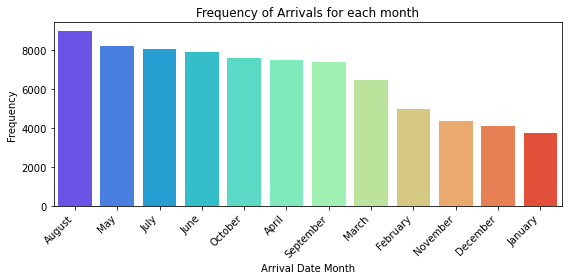

In [26]:
order = dataset['ArrivalDateMonth'].value_counts().index

plt.figure(figsize=(8, 4))
sns.countplot(x='ArrivalDateMonth', data=dataset, order=order, palette='rainbow')

plt.xlabel('Arrival Date Month')
plt.ylabel('Frequency')
plt.title('Frequency of Arrivals for each month')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

## Seasonality

To better analyse the Arrival Date Month a new feature called Season was created to divide the month in 2 categories:
- lower season: where the number of arrival are lower than the average 
- higher season: where the number of arrival are higher than the average

In [27]:
# Calculate the frequency of arrivals in each month
monthly_frequency = dataset['ArrivalDateMonth'].value_counts()

# Determine the threshold for higher and lower seasons
threshold = monthly_frequency.mean()  # You can adjust this threshold as needed

# Create a new column 'Season' based on higher and lower seasons
dataset['Season'] = dataset['ArrivalDateMonth'].apply(
    lambda x: 'Higher Season' if monthly_frequency[x] >= threshold else 'Lower Season'
)

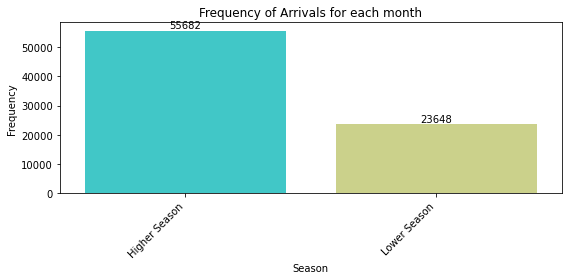

In [28]:
order = dataset['Season'].value_counts().index

plt.figure(figsize=(8, 4))
ax = sns.countplot(x='Season', data=dataset, order=order, palette='rainbow')

plt.xlabel('Season')
plt.ylabel('Frequency')
plt.title('Frequency of Arrivals for each month')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

<Figure size 720x432 with 0 Axes>

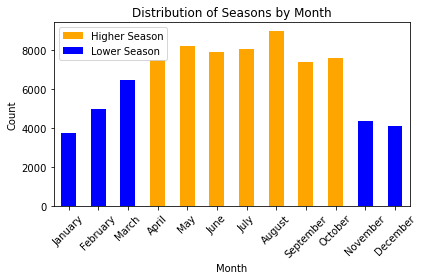

In [29]:
# Set the order of the months for proper sorting
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

# Calculate the count of seasons in each month
season_counts = dataset.groupby(['ArrivalDateMonth', 'Season']).size().unstack()

# Create a bar plot to visualize the distribution of seasons by month
plt.figure(figsize=(10, 6))
season_counts = season_counts.reindex(month_order)  # Reorder the rows based on month_order
season_counts.plot(kind='bar', stacked=True, color=['orange', 'blue'])
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Distribution of Seasons by Month')
plt.xticks(range(len(month_order)), month_order, rotation=45)  # Set x-axis ticks and labels
plt.legend(['Higher Season', 'Lower Season'])
plt.tight_layout()
plt.show()

Observation:
- from April to October we have the the highest affluence (summer season)
- from November to March we have the lowest affluence (winter season)

## Churn Rate Per Month

**January** 39%
**February** 38%
**March** 36%
**April** 46%
**May** 44%
**June** 44%

**July** 40%
**August** 40%
**September** 42%
**October** 42%
**November** 38%
**December** 42%

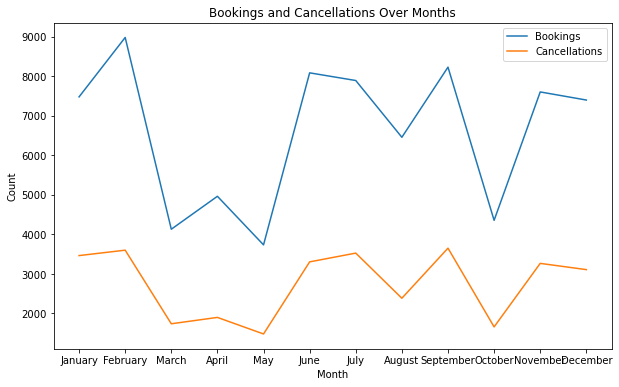

In [30]:
# Group the data by month and calculate the count of bookings and cancellations
booking_counts = dataset.groupby('ArrivalDateMonth')['IsCanceled'].count()
cancellation_counts = dataset.groupby('ArrivalDateMonth')['IsCanceled'].sum()

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(booking_counts.index, booking_counts, label='Bookings')
plt.plot(cancellation_counts.index, cancellation_counts, label='Cancellations')

# Set plot labels and title
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Bookings and Cancellations Over Months')

# Add x-axis tick labels for month names
plt.xticks(range(12), calendar.month_name[1:])

# Add a legend
plt.legend()

# Show the plot
plt.show()

## ArrivalDateYear

In [31]:
dataset['ArrivalDateYear'].value_counts()

2016    38140
2017    27508
2015    13682
Name: ArrivalDateYear, dtype: int64

Observation: the year 2016 contains 46% of the data

In [32]:
#dataset.groupby('ArrivalDateYear').sum()

Observation: the proportion of ArrivalDateYear compared to the nunber of cancellation IsCanceled is
- 2015: 43,8%
- 2016: 40%
- 2017: 42,4%

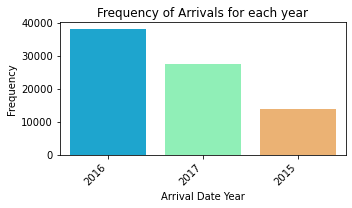

In [33]:
order = dataset['ArrivalDateYear'].value_counts().index

plt.figure(figsize=(5, 3))
sns.countplot(x='ArrivalDateYear', data=dataset, order=order, palette='rainbow')

plt.xlabel('Arrival Date Year')
plt.ylabel('Frequency')
plt.title('Frequency of Arrivals for each year')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

## Arrival Day

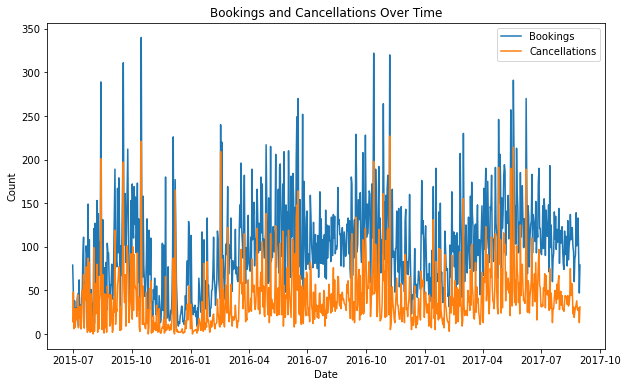

In [34]:
booking_counts = dataset.groupby('ArrivalDate')['IsCanceled'].count()
cancellation_counts = dataset.groupby('ArrivalDate')['IsCanceled'].sum()

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(booking_counts.index, booking_counts, label='Bookings')
plt.plot(cancellation_counts.index, cancellation_counts, label='Cancellations')

# Set plot labels and title
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Bookings and Cancellations Over Time')

# Add a legend
plt.legend()

# Show the plot
plt.show()

By this graph there is not any visible relation between specific dates and cancellations, but that will be further explored by adding new variables for holidays and weather.

## Country

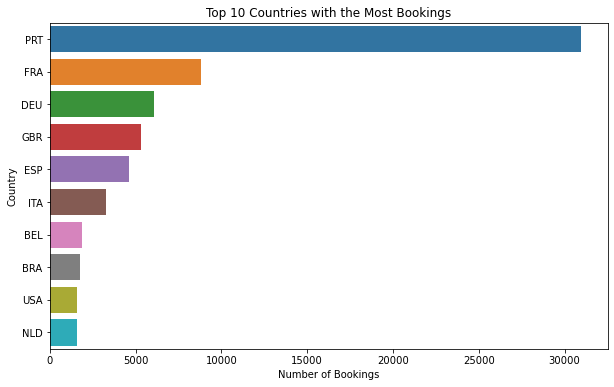

In [35]:
# Count the number of bookings per country
country_bookings = dataset['Country'].value_counts().reset_index()
country_bookings.columns = ['Country', 'Bookings']

# Sort the countries by the number of bookings
country_bookings = country_bookings.sort_values('Bookings', ascending=False)

# Plot the countries with the most bookings
plt.figure(figsize=(10, 6))
sns.barplot(x='Bookings', y='Country', data=country_bookings.head(10))
plt.xlabel('Number of Bookings')
plt.ylabel('Country')
plt.title('Top 10 Countries with the Most Bookings')
plt.show()

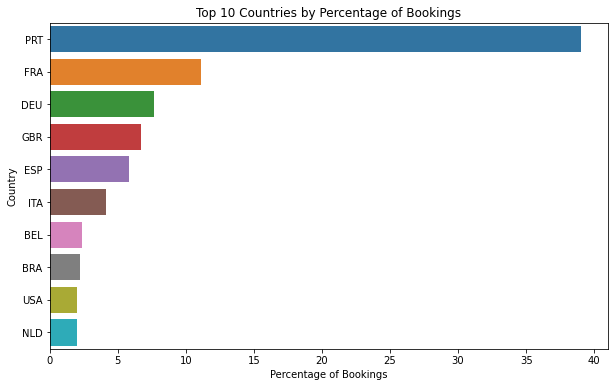

In [36]:
country_bookings = dataset['Country'].value_counts().reset_index()
country_bookings.columns = ['Country', 'Bookings']

# Calculate the percentage of bookings for each country
country_bookings['Percentage'] = (country_bookings['Bookings'] / country_bookings['Bookings'].sum()) * 100

# Sort the countries by the number of bookings
country_bookings = country_bookings.sort_values('Bookings', ascending=False)

# Plot the countries with the percentage of bookings
plt.figure(figsize=(10, 6))
sns.barplot(x='Percentage', y='Country', data=country_bookings.head(10))
plt.xlabel('Percentage of Bookings')
plt.ylabel('Country')
plt.title('Top 10 Countries by Percentage of Bookings')
plt.show()

From two graphs above we can see that most guests come from Portugal(around 40%), folowd by France, Germany, UK, and Spain. Rest of the countries make less then 10% of bookings

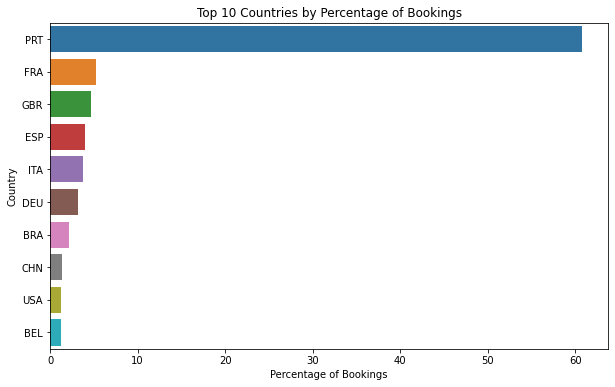

In [37]:
canceled=dataset[dataset['IsCanceled']==1]
country_bookings = canceled['Country'].value_counts().reset_index()
country_bookings.columns = ['Country', 'Bookings']

# Calculate the percentage of bookings for each country
country_bookings['Percentage'] = (country_bookings['Bookings'] / country_bookings['Bookings'].sum()) * 100

# Sort the countries by the number of bookings
country_bookings = country_bookings.sort_values('Bookings', ascending=False)

# Plot the countries with the percentage of bookings
plt.figure(figsize=(10, 6))
sns.barplot(x='Percentage', y='Country', data=country_bookings.head(10))
plt.xlabel('Percentage of Bookings')
plt.ylabel('Country')
plt.title('Top 10 Countries by Percentage of Bookings')
plt.show()

In this graph we can see the Countries that have the highest percentage of booking cancelled. Portugal seems the first with more then 50% of cancellations, but the rest of the countries have less then 10%.

## Time - Date features
We analyse now the two main timedate features: ArrivalDate and ReservationStatusDate to see if there is any similarity

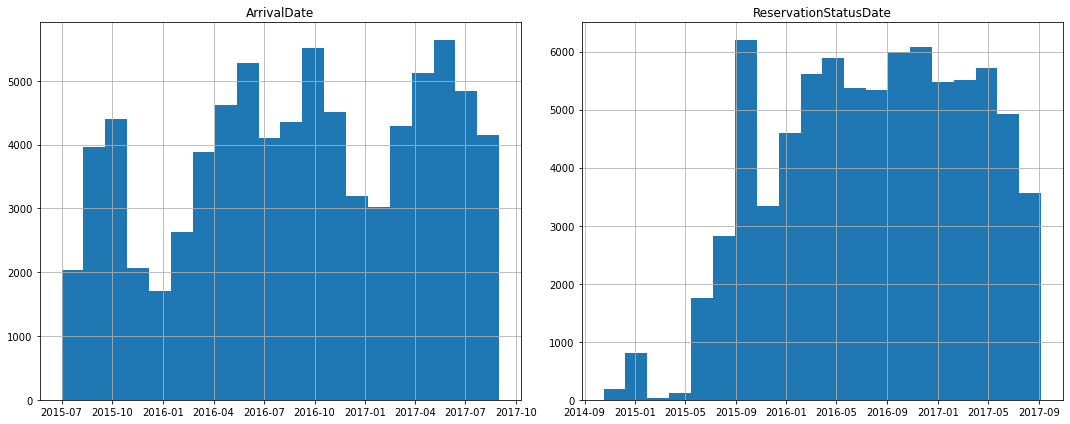

In [38]:
# Convert the columns to datetime type in the temporary copy
dataset['ArrivalDate'] = pd.to_datetime(dataset['ArrivalDate'])
dataset['ReservationStatusDate'] = pd.to_datetime(dataset['ReservationStatusDate'])

# Data visualization - Histograms
dataset[['ArrivalDate', 'ReservationStatusDate']].hist(bins=20, figsize=(15, 6))
plt.tight_layout()
plt.show()

In [39]:
# Descriptive statistics
print(dataset[['ArrivalDate', 'ReservationStatusDate']].describe())

                ArrivalDate ReservationStatusDate
count                 79330                 79330
unique                  793                   864
top     2015-10-16 00:00:00   2015-10-21 00:00:00
freq                    340                  1416
first   2015-07-01 00:00:00   2014-10-17 00:00:00
last    2017-08-31 00:00:00   2017-09-07 00:00:00


Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.


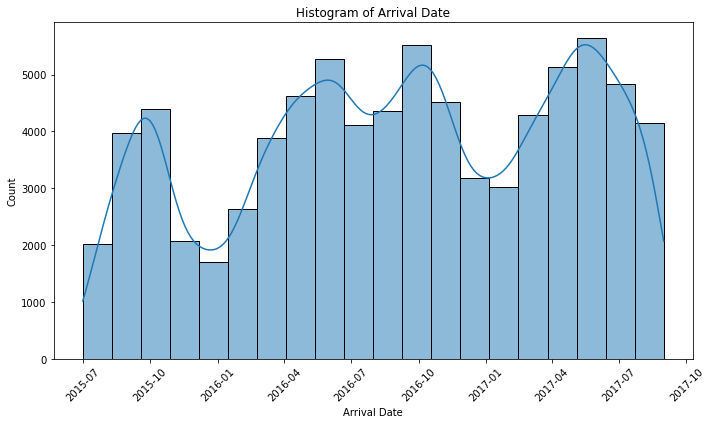

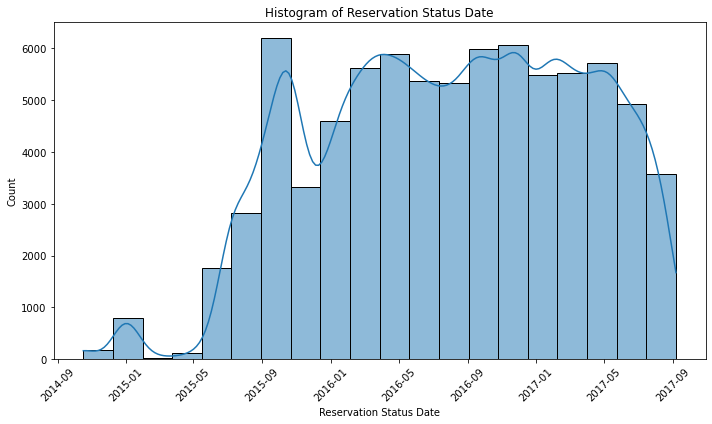

In [40]:
# Convert datetime values to ordinals
dataset['ArrivalDateOrdinal'] = dataset['ArrivalDate'].apply(lambda x: x.toordinal())
dataset['ReservationStatusDateOrdinal'] = dataset['ReservationStatusDate'].apply(lambda x: x.toordinal())

# Convert 'ArrivalDate' and 'ReservationStatusDate' columns to datetime type
dataset['ArrivalDate'] = pd.to_datetime(dataset['ArrivalDate'])
dataset['ReservationStatusDate'] = pd.to_datetime(dataset['ReservationStatusDate'])

# Calculate the duration between 'ArrivalDate' and 'ReservationStatusDate' in days
dataset['Duration'] = (dataset['ReservationStatusDate'] - dataset['ArrivalDate']).dt.days

# Data visualization - Histograms
plt.figure(figsize=(10, 6))
sns.histplot(data=dataset, x='ArrivalDate', kde=True, bins=20)
plt.xticks(rotation=45)
plt.xlabel('Arrival Date')
plt.ylabel('Count')
plt.title('Histogram of Arrival Date')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data=dataset, x='ReservationStatusDate', kde=True, bins=20)
plt.xticks(rotation=45)
plt.xlabel('Reservation Status Date')
plt.ylabel('Count')
plt.title('Histogram of Reservation Status Date')
plt.tight_layout()
plt.show()

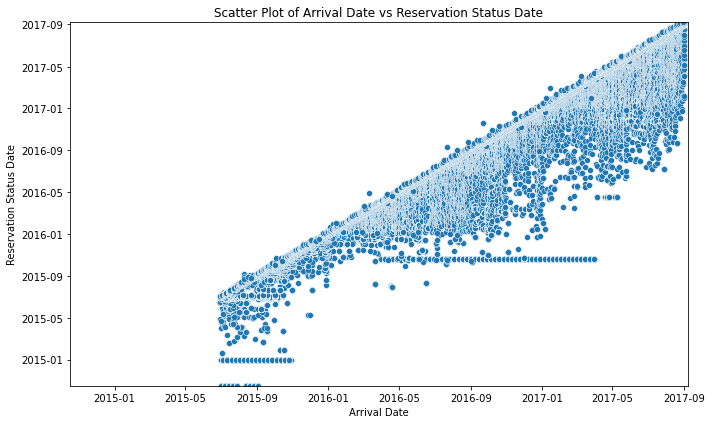

In [41]:
# Create a copy of the dataset for plotting
dataset_copy = dataset.copy()

# Convert datetime values to ordinals in the copy
dataset_copy['ArrivalDateOrdinal'] = dataset_copy['ArrivalDate'].apply(lambda x: x.toordinal())
dataset_copy['ReservationStatusDateOrdinal'] = dataset_copy['ReservationStatusDate'].apply(lambda x: x.toordinal())

# Convert 'ArrivalDate' and 'ReservationStatusDate' columns to datetime type in the copy
dataset_copy['ArrivalDate'] = pd.to_datetime(dataset_copy['ArrivalDate'])
dataset_copy['ReservationStatusDate'] = pd.to_datetime(dataset_copy['ReservationStatusDate'])

# Calculate the duration between 'ArrivalDate' and 'ReservationStatusDate' in days in the copy
dataset_copy['Duration'] = (dataset_copy['ReservationStatusDate'] - dataset_copy['ArrivalDate']).dt.days

# Get the start and end dates
start_date = min(dataset_copy['ArrivalDate'].min(), dataset_copy['ReservationStatusDate'].min())
end_date = max(dataset_copy['ArrivalDate'].max(), dataset_copy['ReservationStatusDate'].max())

# Data visualization - Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ArrivalDate', y='ReservationStatusDate', data=dataset_copy)
plt.xlabel('Arrival Date')
plt.ylabel('Reservation Status Date')
plt.title('Scatter Plot of Arrival Date vs Reservation Status Date')

# Set the limits of both axes to have the same start and end dates
plt.xlim(start_date, end_date)
plt.ylim(start_date, end_date)

plt.tight_layout()
plt.show()

The comparison between the 2 dates is showing how there is a clear upper limit. 

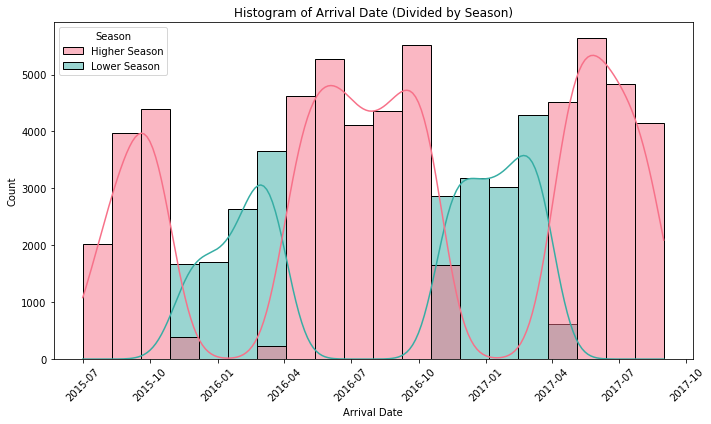

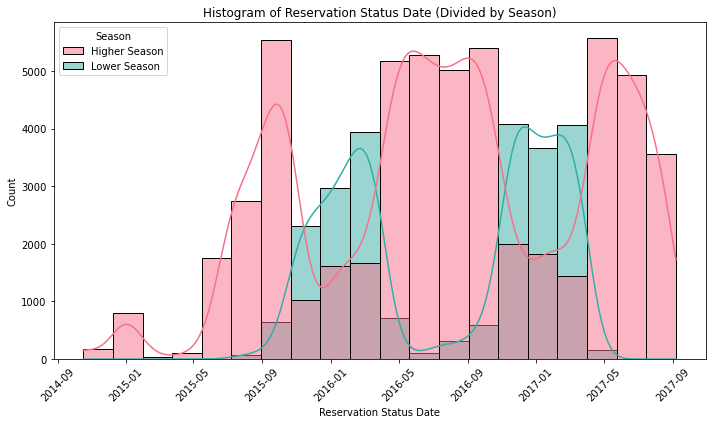

In [42]:
# Data visualization - Histograms divided by season
plt.figure(figsize=(10, 6))
sns.histplot(data=dataset, x='ArrivalDate', hue='Season', kde=True, bins=20, palette='husl')
plt.xticks(rotation=45)
plt.xlabel('Arrival Date')
plt.ylabel('Count')
plt.title('Histogram of Arrival Date (Divided by Season)')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data=dataset, x='ReservationStatusDate', hue='Season', kde=True, bins=20, palette='husl')
plt.xticks(rotation=45)
plt.xlabel('Reservation Status Date')
plt.ylabel('Count')
plt.title('Histogram of Reservation Status Date (Divided by Season)')
plt.tight_layout()
plt.show()

The tw datetime features do not seem to have big differences. 
Both have a relative maximum in the summer season, however, the ReservationStatusDates contains Higher Season values during the winter month: this is, mostlikely, due to the fact that the feature is showing either the check out or the cancellation.

## Agent

Analyze the distribution of bookings among different travel agencies and determine if certain agencies have higher cancellation rates or if there are any patterns or relationships between agencies and customer churn.

In [43]:
# Calculate the distributions of bookings among different travel agencies 
agency_counts = pd.crosstab(index=dataset['Agent'], columns='Number of bookings')
agency_counts

# Calculate the cancellation rate for each agency 
cancel_rates_agency = pd.crosstab(index=dataset['Agent'], columns=dataset['IsCanceled'], normalize='index')
cancel_rates_agency.columns = ['Not Cancelled', 'Cancelled']

# Check the Cross table of the distributions of bookings 
print('Agencies with major number of bookings:')
agency_counts.sort_values(by="Number of bookings",ascending=False).head(10).T

Agencies with major number of bookings:


Agent                         9         NULL            1           14  \
col_0                                                                    
Number of bookings        31955         8131         7137         3640   

Agent                         7            6           28            3  \
col_0                                                                    
Number of bookings         3539         2683         1666         1308   

Agent                         8           37  
col_0                                         
Number of bookings         1236         1230

In this case NULL does not represent a null value but rather reservations made without an agency.

In [44]:
# Cross Table of Cancellation Rate for Agency
print('\nCancellation Rate for Agency:')
cancel_rates_agency.T


Cancellation Rate for Agency:


Agent                    1            2            3            4  \
Not Cancelled     0.267199         0.55     0.413609     0.340426   
Cancelled         0.732801         0.45     0.586391     0.659574   

Agent                    5            6            7            8  \
Not Cancelled          0.0     0.639955     0.866064     0.686084   
Cancelled              1.0     0.360045     0.133936     0.313916   

Agent                    9           10  ...          464          467  \
Not Cancelled     0.584979     0.753036  ...          1.0          1.0   
Cancelled         0.415021     0.246964  ...          0.0          0.0   

Agent                  474          475          476          480  \
Not Cancelled          1.0          1.0          1.0          1.0   
Cancelled              0.0          0.0          0.0          0.0   

Agent                  484          495          509         NULL  
Not Cancelled     0.909091          1.0          0.8     0.679129  
Cancelled         0.090909          0.0          0.2     0.320871  

[2 rows x 224 columns]

The table above shows the percentage of canceled bookings for each agent in relation to bookings made by that agent.
<br>
Now we are going to check tha agencies with the highest rate of cancellation and the ones with the lowest.

In [45]:
# Check the total number of agencies with 100% cancellation rate (cancel rate = 1.0)
num_agencies_max_cancel_rate = cancel_rates_agency[cancel_rates_agency['Cancelled'] == 1.0].shape[0]
num_agencies_max_cancel_rate

21

In [46]:
# Check the total number of agencies without cancellations (cancel rate = 0.0)
num_agencies_without_cancellations = cancel_rates_agency[cancel_rates_agency['Cancelled'] == 0.0].shape[0]
num_agencies_without_cancellations

86

In [47]:
# Some agencies with cancel rate = 100% 
agencies_with_100_cancel_rate = cancel_rates_agency[cancel_rates_agency['Cancelled'] == 1.0]
agencies_with_100_cancel_rate = agencies_with_100_cancel_rate.reset_index()
agencies_with_100_cancel_rate.head(10).T

0            1            2            3  \
Agent                    5           41           47           55   
Not Cancelled          0.0          0.0          0.0          0.0   
Cancelled              1.0          1.0          1.0          1.0   

                         4            5            6            7  \
Agent                   60           64           78           93   
Not Cancelled          0.0          0.0          0.0          0.0   
Cancelled              1.0          1.0          1.0          1.0   

                         8            9  
Agent                  107          162  
Not Cancelled          0.0          0.0  
Cancelled              1.0          1.0

In [48]:
# Some agencies with cancel rate = 0% 
agencies_with_0_cancel_rate = cancel_rates_agency[cancel_rates_agency['Cancelled'] == 0.0]
agencies_with_0_cancel_rate = agencies_with_0_cancel_rate.reset_index()
agencies_with_0_cancel_rate.head(10).T

0            1            2            3  \
Agent                   24           25           36           54   
Not Cancelled          1.0          1.0          1.0          1.0   
Cancelled              0.0          0.0          0.0          0.0   

                         4            5            6            7  \
Agent                   61           63           69           70   
Not Cancelled          1.0          1.0          1.0          1.0   
Cancelled              0.0          0.0          0.0          0.0   

                         8            9  
Agent                   72           73  
Not Cancelled          1.0          1.0  
Cancelled              0.0          0.0

In [49]:
# select the first numerical 10 agents with cancel rate = 0%
agent_list_0_cancel = ['24', '25', '36', '54', '61', '63', '69', '70', '72', '73']

# reset the index to make 'Agent' a column again
agency_counts = agency_counts.reset_index()

# convert agent_list_0_cancel to strings and remove leading/trailing spaces
agent_list_0_cancel = [str(agent).strip() for agent in agent_list_0_cancel]

# select only the agents with cancellation rate = 0 from the agency_counts
selected_agents = agency_counts[agency_counts['Agent'].astype(str).str.strip().isin(agent_list_0_cancel)]
print('\n Bookings of First 10 Agents with 0% Cancellation Rate:')
selected_agents[['Agent', 'Number of bookings']].reset_index(drop=True)


 Bookings of First 10 Agents with 0% Cancellation Rate:


col_0        Agent  Number of bookings
0               24                  22
1               25                   3
2               36                  29
3               54                   1
4               61                   2
5               63                  29
6               69                   2
7               70                   1
8               72                   3
9               73                   1

## ReservedRoomType vs AssignedRoomType

We want to investigate further the cases in which a different room than the one booked was assigned. In fact, in the case where there has been an upgrade in the level of the room from the one originally planned, customer satisfaction probably increases. Whereas in the case where a lower level room was assigned, customer satisfaction drops and may affect the churn rate. <br>
<br>
From our understanding from the business side, A is the cheapest room.

In [50]:
# Filter the relevant columns from the dataset
filtered_data = dataset[['ArrivalDateMonth', 'AssignedRoomType', 'DepositType', 'IsCanceled', 'ReservationStatus', 'ReservedRoomType']]

# Check for discrepancies between AssignedRoomType and ReservedRoomType
discrepancies = filtered_data[filtered_data['AssignedRoomType'] != filtered_data['ReservedRoomType']]

# Check the impact on customer satisfaction or churn
if len(discrepancies) > 0:
    # we have some discrepancies
    satisfaction_impact = discrepancies.groupby(['AssignedRoomType', 'ReservedRoomType']).size().reset_index(name='Count')
    churn_impact = discrepancies.groupby('ReservationStatus').size().reset_index(name='Count')
    
    print("Discrepancies found:")
    print(discrepancies)
    print("Discrepancies between AssignedRoomType and ReservedRoomType:")
    print(satisfaction_impact)
    print("Impact on churn:")
    print(churn_impact)
else:
    print("No discrepancies found.")

Discrepancies found:
      ArrivalDateMonth  AssignedRoomType      DepositType  IsCanceled  \
134               July  F                 No Deposit                1   
139               July  A                 No Deposit                0   
237               July  D                 No Deposit                0   
250               July  D                 No Deposit                0   
253               July  D                 No Deposit                0   
...                ...               ...              ...         ...   
79213           August  K                 No Deposit                0   
79214           August  K                 No Deposit                0   
79229           August  F                 No Deposit                0   
79237           August  F                 No Deposit                0   
79297           August  D                 No Deposit                0   

      ReservationStatus  ReservedRoomType  
134            Canceled  A                 
139           

In [51]:
superior_rooms = satisfaction_impact[satisfaction_impact['ReservedRoomType'] < satisfaction_impact['AssignedRoomType']]
superior_rooms

AssignedRoomType  ReservedRoomType  Count
6   B                 A                   970
11  C                 A                   142
15  D                 A                  3992
16  D                 B                     5
19  E                 A                   434
20  E                 B                     2
21  E                 D                   298
24  F                 A                   176
25  F                 B                     2
26  F                 D                    82
27  F                 E                    67
29  G                 A                    90
30  G                 B                     8
31  G                 D                    43
32  G                 E                    18
33  G                 F                    79
34  K                 A                   210
35  K                 B                     2
36  K                 D                    44
37  K                 E                    16
38  K                 F                     3
39  K                 G                     4

In [52]:
inferior_rooms = satisfaction_impact[satisfaction_impact['ReservedRoomType'] > satisfaction_impact['AssignedRoomType']]
inferior_rooms

AssignedRoomType  ReservedRoomType  Count
0   A                 B                   111
1   A                 C                     3
2   A                 D                   292
3   A                 E                    11
4   A                 F                     4
5   A                 G                     5
7   B                 D                    27
8   B                 E                     3
9   B                 F                    17
10  B                 G                     2
12  C                 D                     6
13  C                 E                     1
14  C                 G                     1
17  D                 E                     7
18  D                 F                     3
22  E                 F                     2
23  E                 G                     2
28  F                 G                     8

We check whether there is an effetive relationship in cases where the room was changed and the reservation was canceled:

In [53]:
# Creation of a contingency table 
contingency_table = pd.crosstab(discrepancies['AssignedRoomType'] != discrepancies['ReservedRoomType'], discrepancies['IsCanceled'], margins=True)

# Calculate the percentage 
total = contingency_table['All']['All']
contingency_table_percent = (contingency_table / total) * 100

# Check the results
print("\nContingency table:")
print(contingency_table)
print("\nContingency table (percentages):")
contingency_table_percent


Contingency table:
IsCanceled     0    1   All
row_0                      
True        6774  418  7192
All         6774  418  7192

Contingency table (percentages):


IsCanceled          0         1    All
row_0                                 
True        94.187987  5.812013  100.0
All         94.187987  5.812013  100.0

In the first table, absolute frequencies are shown as actual counts. For example, there are 6774 cases where the assigned room is different from the one booked and the reservation was not cancelled, while there are 418 cases where the assigned room is different from the one booked and the reservation was cancelled. The total sum of cases is 7192.
<br>
The second table, "Contingency Table (percentages)," shows the percentages related to the total. The percentage of cases where the assigned room is different from the one booked and the reservation was not canceled is 94.19%, while the percentage of cases where the assigned room is different from the one booked and the reservation was canceled is 5.81%.

Checking the situation among lower level assigned rooms than booked rooms, we see that the churn rate does not seem to be affected by this factor since, for example, 5.92% of the cases with "AssignedRoomType" A have "IsCanceled" equal to 0 and 0.21% have "IsCanceled" equal to 1 and in general the values of "IsCanceled" remain low.

## ADR

In [54]:
# Filter the DataFrame for canceled bookings
canceled_bookings = dataset[dataset['IsCanceled'] == 1]

# Filter for positive ADR values in canceled bookings
positive_adr_canceled = canceled_bookings[canceled_bookings['ADR'] > 0]
positive_adr_canceled

IsCanceled  LeadTime  ArrivalDateYear ArrivalDateMonth  \
1               1        88             2015             July   
2               1        65             2015             July   
3               1        92             2015             July   
4               1       100             2015             July   
5               1        79             2015             July   
...           ...       ...              ...              ...   
68769           1        25             2017              May   
71295           1         4             2017             June   
71864           1         7             2017              May   
71865           1         6             2017             July   
77235           1         0             2017           August   

       ArrivalDateWeekNumber  ArrivalDateDayOfMonth  StaysInWeekendNights  \
1                         27                      1                     0   
2                         27                      1                     0   
3                         27                      1                     2   
4                         27                      2                     0   
5                         27                      2                     0   
...                      ...                    ...                   ...   
68769                     18                      6                     2   
71295                     23                      5                     1   
71864                     22                     31                     0   
71865                     29                     17                     1   
77235                     31                      2                     0   

       StaysInWeekNights  Adults  Children  ...  ReservationStatusDate  \
1                      4       2       0.0  ...             2015-07-01   
2                      4       1       0.0  ...             2015-04-30   
3                      4       2       0.0  ...             2015-06-23   
4                      2       2       0.0  ...             2015-04-02   
5                      3       2       0.0  ...             2015-06-25   
...                  ...     ...       ...  ...                    ...   
68769                  1       1       0.0  ...             2017-05-06   
71295                  0       1       0.0  ...             2017-06-05   
71864                  1       1       0.0  ...             2017-05-31   
71865                  0       1       0.0  ...             2017-07-17   
77235                  2       1       0.0  ...             2017-08-02   

      ArrivalDate BookingsPerDate IsPortugueseHoliday  \
1      2015-07-01              79                   1   
2      2015-07-01              79                   1   
3      2015-07-01              79                   1   
4      2015-07-02              49                   1   
5      2015-07-02              49                   1   
...           ...             ...                 ...   
68769  2017-05-06             187                   1   
71295  2017-06-05             132                   1   
71864  2017-05-31             111                   1   
71865  2017-07-17             125                   1   
77235  2017-08-02             106                   1   

      IsPortugueseHolidayArrival  Weather         Season  ArrivalDateOrdinal  \
1                              0        C  Higher Season              735780   
2                              0        C  Higher Season              735780   
3                              0        C  Higher Season              735780   
4                              0        S  Higher Season              735781   
5                              0        S  Higher Season              735781   
...                          ...      ...            ...                 ...   
68769                          0        C  Higher Season              736455   
71295                          0        S  Higher Season              736485   
71864  

Strangely, there seem to be positive values in the average daily rate even if the reservation turns out to be cancelled. Below we also check cases where no deposit was left, so the hotel should not have received any money for that reservation.

In [55]:
# Remove white spaces from DepositType
dataset['DepositType'] = dataset['DepositType'].str.strip()
# set ADR as float
dataset['ADR'] = dataset['ADR'].astype(float)

# Filter the dataframe for cancelled bookings with no deposit and positive values of ADR
filtered_data = dataset[(dataset['ADR'] > 0) & (dataset['IsCanceled'] == 1) & (dataset['DepositType'] == 'No Deposit')]
filtered_data[['ADR', 'IsCanceled', 'DepositType']]

ADR  IsCanceled DepositType
1       76.5           1  No Deposit
2       68.0           1  No Deposit
3       76.5           1  No Deposit
4       76.5           1  No Deposit
5       76.5           1  No Deposit
...      ...         ...         ...
68769  125.0           1  No Deposit
71295   65.0           1  No Deposit
71864   65.0           1  No Deposit
71865   65.0           1  No Deposit
77235   65.0           1  No Deposit

[20115 rows x 3 columns]

Discussing with the business side, we found that many of the No Deposit values may not have been recorded correctly. Therefore, we do not continue to explore the values found. 

## Company

In [56]:
# Calculate the distributions of bookings among different companies
company_counts = pd.crosstab(index=dataset['Company'], columns='Number of bookings')
company_counts

# Calculate the cancellation rate for each company 
cancel_rates_company = pd.crosstab(index=dataset['Company'], columns=dataset['IsCanceled'], normalize='index')
cancel_rates_company.columns = ['Not Cancelled', 'Cancelled']

# Check the Cross table of the distributions of bookings 
print('Companies with major number of bookings:')
company_counts.sort_values(by="Number of bookings",ascending=False).head(10).T

Companies with major number of bookings:


Company                    NULL           40           67           45  \
col_0                                                                    
Number of bookings        75641          924          267          250   

Company                     153          219          233          174  \
col_0                                                                    
Number of bookings          215          141          114          113   

Company                      51          242  
col_0                                         
Number of bookings           86           61

Null values do not indicate absence of data but rather that the reservation was not made by a company.

In [57]:
# Cross Table of Cancellation Rate for Company
print('\nCancellation Rate for Company:')
cancel_rates_company.T


Cancellation Rate for Company:


Company                  8            9           11           14  \
Not Cancelled          1.0     0.933333          1.0     0.857143   
Cancelled              0.0     0.066667          0.0     0.142857   

Company                 18           35           37           38  \
Not Cancelled          1.0          1.0          0.0      0.72549   
Cancelled              0.0          0.0          1.0      0.27451   

Company                 40           43  ...          481          483  \
Not Cancelled     0.916667          0.0  ...          1.0          1.0   
Cancelled         0.083333          1.0  ...          0.0          0.0   

Company                485          486          489          491  \
Not Cancelled          1.0          1.0          1.0          1.0   
Cancelled              0.0          0.0          0.0          0.0   

Company                492          494          497         NULL  
Not Cancelled          1.0          1.0          1.0     0.572745  
Cancelled              0.0          0.0          0.0     0.427255  

[2 rows x 208 columns]

In [58]:
# Check the total number of companies with 100% cancellation rate (cancel rate = 1.0)
num_company_max_cancel_rate = cancel_rates_company[cancel_rates_company['Cancelled'] == 1.0].shape[0]
num_company_max_cancel_rate

15

In [59]:
# Check the total number of agencies without cancellations (cancel rate = 0.0)
num_companies_without_cancellations = cancel_rates_company[cancel_rates_company['Cancelled'] == 0.0].shape[0]
num_companies_without_cancellations

135

In [60]:
# Some companies with cancel rate = 100% 
companies_with_100_cancel_rate = cancel_rates_company[cancel_rates_company['Cancelled'] == 1.0]
companies_with_100_cancel_rate = companies_with_100_cancel_rate.reset_index()
companies_with_100_cancel_rate.head(10).T

0            1            2            3  \
Company                 37           43           48          122   
Not Cancelled          0.0          0.0          0.0          0.0   
Cancelled              1.0          1.0          1.0          1.0   

                         4            5            6            7  \
Company                202          253          277          279   
Not Cancelled          0.0          0.0          0.0          0.0   
Cancelled              1.0          1.0          1.0          1.0   

                         8            9  
Company                309          316  
Not Cancelled          0.0          0.0  
Cancelled              1.0          1.0

In [61]:
# Some companies with cancel rate = 0% 
companies_with_0_cancel_rate = cancel_rates_company[cancel_rates_company['Cancelled'] == 0.0]
companies_with_0_cancel_rate = companies_with_0_cancel_rate.reset_index()
companies_with_0_cancel_rate.head(10).T

0            1            2            3  \
Company                  8           11           18           35   
Not Cancelled          1.0          1.0          1.0          1.0   
Cancelled              0.0          0.0          0.0          0.0   

                         4            5            6            7  \
Company                 49           65           71           76   
Not Cancelled          1.0          1.0          1.0          1.0   
Cancelled              0.0          0.0          0.0          0.0   

                         8            9  
Company                 84           96  
Not Cancelled          1.0          1.0  
Cancelled              0.0          0.0

#### Companies that tend to book through Agent

In [62]:
# Group by Company and count the number of unique values in Agent 
companies_booking_through_agent = dataset.dropna(subset=['Company']).groupby('Company')['Agent'].nunique().reset_index()

# Sort the result in descending order
companies_booking_through_agent = companies_booking_through_agent.sort_values(by='Agent', ascending=False)
companies_booking_through_agent.T

207          52           65           10           137  \
Company         NULL          148          186           45          333   
Agent            223            2            2            2            2   

                 185          27           1            3            136  ...  \
Company          444           85            9           14          332  ...   
Agent              2            2            2            2            1  ...   

                 70           71           72           73           74   \
Company          207          209          210          213          215   
Agent              1            1            1            1            1   

                 75           76           77           78           104  
Company          216          217          218          219          271  
Agent              1            1            1            1            1  

[2 rows x 208 columns]

## MarketSegment

In [63]:
# Calculate the distributions of bookings among different market segment
booking_market_segment_counts = pd.crosstab(index=dataset['MarketSegment'], columns='Number of bookings')
booking_market_segment_counts

# Calculate the cancellation rate for each market segment
cancel_rates_market_segment = pd.crosstab(index=dataset['MarketSegment'], columns=dataset['IsCanceled'], normalize='index')
cancel_rates_market_segment.columns = ['Not Cancelled', 'Cancelled']

# Check the Cross table of the distributions of bookings 
booking_market_segment_counts.sort_values(by="Number of bookings",ascending=False)

col_0          Number of bookings
MarketSegment                    
Online TA                   38748
Offline TA/TO               16747
Groups                      13975
Direct                       6093
Corporate                    2986
Complementary                 542
Aviation                      237
Undefined                       2

In [64]:
dataset[dataset["MarketSegment"] == "Undefined"]

IsCanceled  LeadTime  ArrivalDateYear ArrivalDateMonth  \
540           1         2             2015           August   
619           1         1             2015           August   

     ArrivalDateWeekNumber  ArrivalDateDayOfMonth  StaysInWeekendNights  \
540                     32                      3                     1   
619                     32                      5                     0   

     StaysInWeekNights  Adults  Children  ...  ReservationStatusDate  \
540                  0       2       NaN  ...             2015-08-01   
619                  2       3       NaN  ...             2015-08-04   

    ArrivalDate BookingsPerDate IsPortugueseHoliday  \
540  2015-08-03             121                   1   
619  2015-08-05             127                   1   

    IsPortugueseHolidayArrival  Weather         Season  ArrivalDateOrdinal  \
540                          0        C  Higher Season              735813   
619                          0        S  Higher Season              735815   

    ReservationStatusDateOrdinal Duration  
540                       735811       -2  
619                       735814       -1  

[2 rows x 40 columns]

In the case of the MarketSegment called "Undefined," we only have 2 values so we can probably remove them. 

In [65]:
# Cross Table of Cancellation Rate for Market Segment
print('\nCancellation Rate for Market Segment:')
cancel_rates_market_segment


Cancellation Rate for Market Segment:


Not Cancelled  Cancelled
MarketSegment                          
Aviation            0.780591   0.219409
Complementary       0.881919   0.118081
Corporate           0.785332   0.214668
Direct              0.826686   0.173314
Groups              0.311413   0.688587
Offline TA/TO       0.571684   0.428316
Online TA           0.626019   0.373981
Undefined           0.000000   1.000000

Text(0, 0.5, 'Cancellation Rate')

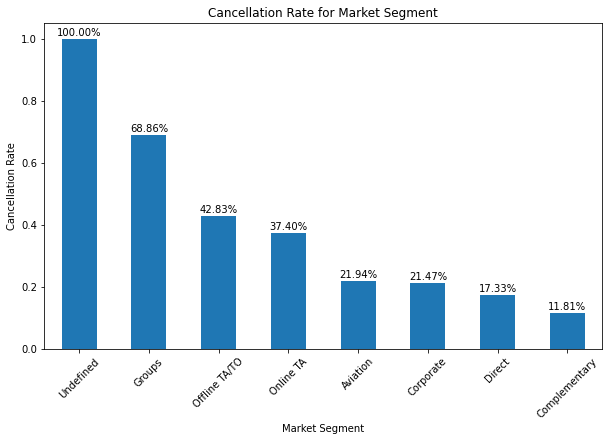

In [66]:
# Calculate the cancel rate for market segment
cancel_rate_market_segment = dataset.groupby('MarketSegment')['IsCanceled'].mean().sort_values(ascending=False)

# Barplot
plt.figure(figsize=(10, 6))
cancel_rate_market_segment.plot(kind='bar')

# Add the number labels
for i, value in enumerate(cancel_rate_market_segment):
    plt.text(i, value + 0.01, f'{value*100:.2f}%', ha='center')
plt.xticks(rotation=45)

plt.title('Cancellation Rate for Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('Cancellation Rate')

The biggest Market Segment are:
- Unedentified
- Groups
- Offline TA/TO

## LeadTime

In [67]:
canceled['LeadTime'].value_counts()

56     319
34     288
28     283
37     277
0      273
      ... 
389      1
387      1
366      1
429      1
380      1
Name: LeadTime, Length: 452, dtype: int64

In [68]:
canceled[canceled['LeadTime']==0]

IsCanceled  LeadTime  ArrivalDateYear ArrivalDateMonth  \
134             1         0             2015             July   
583             1         0             2015           August   
584             1         0             2015           August   
701             1         0             2015           August   
948             1         0             2015           August   
...           ...       ...              ...              ...   
58749           1         0             2016         December   
58750           1         0             2016         December   
61870           1         0             2017             June   
65849           1         0             2017            April   
77235           1         0             2017           August   

       ArrivalDateWeekNumber  ArrivalDateDayOfMonth  StaysInWeekendNights  \
134                       29                     15                     0   
583                       32                      4                     0   
584                       32                      4                     0   
701                       32                      7                     0   
948                       33                     10                     1   
...                      ...                    ...                   ...   
58749                     51                     12                     1   
58750                     51                     12                     1   
61870                     26                     29                     0   
65849                     16                     18                     0   
77235                     31                      2                     0   

       StaysInWeekNights  Adults  Children  ...  RequiredCarParkingSpaces  \
134                    1       2       0.0  ...                         0   
583                    1       2       0.0  ...                         0   
584                    1       2       0.0  ...                         0   
701                    1       2       0.0  ...                         0   
948                    4       2       0.0  ...                         0   
...                  ...     ...       ...  ...                       ...   
58749                  0       2       0.0  ...                         0   
58750                  0       2       0.0  ...                         0   
61870                  1       2       0.0  ...                         0   
65849                  1       1       0.0  ...                         0   
77235                  2       1       0.0  ...                         0   

      TotalOfSpecialRequests ReservationStatus ReservationStatusDate  \
134                        0          Canceled            2015-07-15   
583                        0          Canceled            2015-08-04   
584                        0          Canceled            2015-08-04   
701                        0          Canceled            2015-08-07   
948                        2          Canceled            2015-08-10   
...                      ...               ...                   ...   
58749                      2          Canceled            2016-12-12   
58750                      2          Canceled            2016-12-12   
61870                      0          Canceled            2017-06-29   
65849                      2          Canceled            2017-04-18   
77235                      1           No-Show            2017-08-02   

      ArrivalDate  BookingsPerDate  IsPortugueseHoliday  \
134    2015-07-15               42                    1   
583    2015-08-04               12                    1   
584    2015-08-04               12                    1   
701    2015-08-07               92                    1   
948    2015-08-10              138                    1   
...           ...              ...                  ...   
58749  2016-12-12               44                    1   
58750  2016-12-12               44     

In [69]:
# Define the bin edges and labels for the lead time categories
bin_edges = [0, 1, 7, 14, 30, 60, dataset['LeadTime'].max()]
bin_labels = ['0 days', '1-7 days', '8-14 days', '15-30 days', '31-60 days', '60+ days']

# Create a new column 'BookingLeadTimeCategory' with the category labels
dataset['LeadTimeCategory'] = pd.cut(dataset['LeadTime'], bins=bin_edges, labels=bin_labels, include_lowest=True)

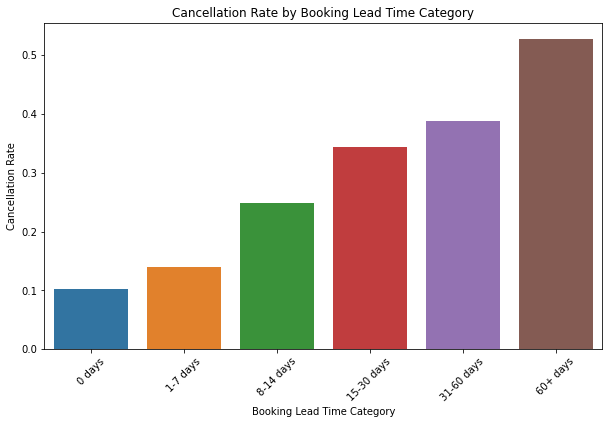

In [70]:
cancellation_rate = dataset.groupby('LeadTimeCategory')['IsCanceled'].mean()

# Create a bar plot to visualize the cancellation rate based on the booking lead time category
plt.figure(figsize=(10, 6))
sns.barplot(x=cancellation_rate.index, y=cancellation_rate)
plt.xlabel('Booking Lead Time Category')
plt.ylabel('Cancellation Rate')
plt.title('Cancellation Rate by Booking Lead Time Category')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

The higher the lead time the more likely that you are going to cancel booking.

In [71]:
# Count the number of bookings made on the same day as the arrival
same_day_bookings = dataset[dataset['LeadTime'] == 0]
num_same_day_bookings = len(same_day_bookings)

# Print the number of bookings made on the same day
print(f"The number of bookings made on the same day as the arrival is: {num_same_day_bookings}")

The number of bookings made on the same day as the arrival is: 3109


## Weekdays and Weekends

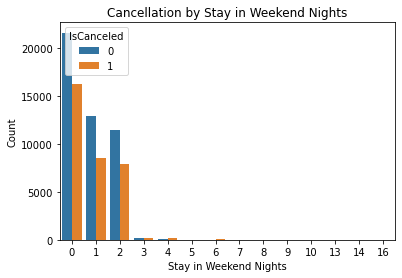

In [72]:
# Create a countplot to visualize the relationship
sns.countplot(x='StaysInWeekendNights', hue='IsCanceled', data=dataset)
plt.xlabel('Stay in Weekend Nights')
plt.ylabel('Count')
plt.title('Cancellation by Stay in Weekend Nights')
plt.show()

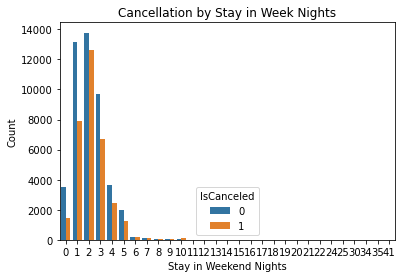

In [73]:
# Create a countplot to visualize the relationship
sns.countplot(x='StaysInWeekNights', hue='IsCanceled', data=dataset)
plt.xlabel('Stay in Weekend Nights')
plt.ylabel('Count')
plt.title('Cancellation by Stay in Week Nights')
plt.show()

## WaitingList

In [74]:
pd.crosstab(dataset['IsCanceled'], dataset['DaysInWaitingList'])

DaysInWaitingList    0    1    2    3    4    5    6    7    8    9    ...  \
IsCanceled                                                             ...   
0                  45127    5    2    0   14    2   12    1    0    2  ...   
1                  30760    2    1   59    8    3    0    3    4   14  ...   

DaysInWaitingList  193  207  215  223  224  236  259  330  379  391  
IsCanceled                                                           
0                    0   10    8   36    4   29   10   14    6    0  
1                    1    5   13   25    6    6    0    1    9   45  

[2 rows x 115 columns]

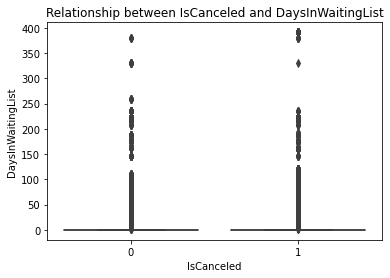

In [75]:
# Create a box plot or violin plot to visualize the relationship
sns.boxplot(x='IsCanceled', y='DaysInWaitingList', data=dataset)
plt.xlabel('IsCanceled')
plt.ylabel('DaysInWaitingList')
plt.title('Relationship between IsCanceled and DaysInWaitingList')
plt.show()

Some bookings seem to have an extremely long waiting list: more than 300 days.

## PreviousCancellations

In [76]:
dataset['PreviousCancellations'].value_counts()

0     73941
1      5155
2        72
3        51
11       35
4        25
6        22
5        16
13       12
21        1
Name: PreviousCancellations, dtype: int64

The majority of previous cancellations are 0 (93%). The second most populated are 1 (6%), and 2 (0,09%).

In [77]:
# Check the client who made a cancellation 21 times
dataset[dataset['PreviousCancellations']==21]

IsCanceled  LeadTime  ArrivalDateYear ArrivalDateMonth  \
33654           1       265             2015             July   

       ArrivalDateWeekNumber  ArrivalDateDayOfMonth  StaysInWeekendNights  \
33654                     28                      9                     0   

       StaysInWeekNights  Adults  Children  ...  ArrivalDate BookingsPerDate  \
33654                  2       2       0.0  ...   2015-07-09              46   

      IsPortugueseHoliday IsPortugueseHolidayArrival Weather         Season  \
33654                   1                          0       S  Higher Season   

       ArrivalDateOrdinal  ReservationStatusDateOrdinal Duration  \
33654              735788                        735523     -265   

      LeadTimeCategory  
33654         60+ days  

[1 rows x 41 columns]

In [78]:
# Check the client who made a cancellation 11 times
dataset[dataset['PreviousCancellations']==11]

IsCanceled  LeadTime  ArrivalDateYear ArrivalDateMonth  \
39968           1         1             2015         December   
39969           1         1             2015         December   
39970           0         0             2016          January   
39971           0         1             2016          January   
39972           0         1             2016          January   
39973           0         1             2016          January   
39974           0         2             2016          January   
39975           0         4             2016          January   
39976           0         2             2016          January   
39977           0         3             2016          January   
39978           0         1             2016          January   
39979           0         0             2016          January   
39980           0         5             2016          January   
39981           0         4             2016          January   
39982           0         8             2016          January   
39983           0         1             2016          January   
39984           0         4             2016          January   
39985           0         5             2016          January   
39986           0         3             2016          January   
39987           0         2             2016          January   
39988           0         0             2016          January   
39989           0         5             2016          January   
39990           0         1             2016          January   
39991           0        12             2016         February   
39992           0         8             2016         February   
39993           0         1             2016         February   
39994           0        10             2016         February   
39995           1       190             2016            April   
39996           1       190             2016            April   
39997           1       190             2016            April   
39998           1       190             2016            April   
39999           1       190             2016            April   
40000           1       190             2016            April   
40001           1       190             2016            April   
40002           1       190             2016            April   

       ArrivalDateWeekNumber  ArrivalDateDayOfMonth  StaysInWeekendNights  \
39968                     52                     24                     0   
39969                     52                     24                     0   
39970                      2                      7                     0   
39971                      2                      8                     0   
39972                      2                      8                     0   
39973                      2                      9                     1   
39974                      3                     12                     0   
39975                      3                     12                     0   
39976                      3                     13                     0   
39977                      3                     14                     0   
39978                      3                     14                     0   
39979                      3                     14                     0   
39980                      3                     14                     0   
39981                      3                     15                     0   
39982                      3                     15                     0   
39983                      3                     15                     0   
39984                      3                     15                     0   
39985                      3                     15                     0   
39986                      3                     16                     2   
39987                      3                     16                     0   
39988                      4                     

<a class="anchor" id="5">

# 5. Data Preparation
    
</a>


<a class="anchor" id="5.1">

## 5.1 Missing Values
    
</a>

We found the presence of missing values in the following characteristics:

- Children
- Country: please refer to section 5.3 Feature Engineering - Country
- Company
- Agents
<br>

Specifically, for the "Company" and "Agents" features, "NULL" values in their respective columns do not indicate the absence of data, but rather that the booking was made directly without the involvement of intermediary agencies or a specific company. Therefore, the null values have only been renamed. 

### Children - Missing Values
Since we have only 4 missing values for the "Children" section, and presumably these data were not provided by customers because they had no information available, we opted to set these missing values to 0.

In [79]:
# Fill missing values in children variable with 0
dataset['Children'].fillna('0', inplace=True)

In [80]:
dataset['Children'].dtype

dtype('O')

In [81]:
dataset['Children'] = dataset['Children'].astype(int)

<a class="anchor" id="5.2">

## 5.2 Outliers
    
</a>

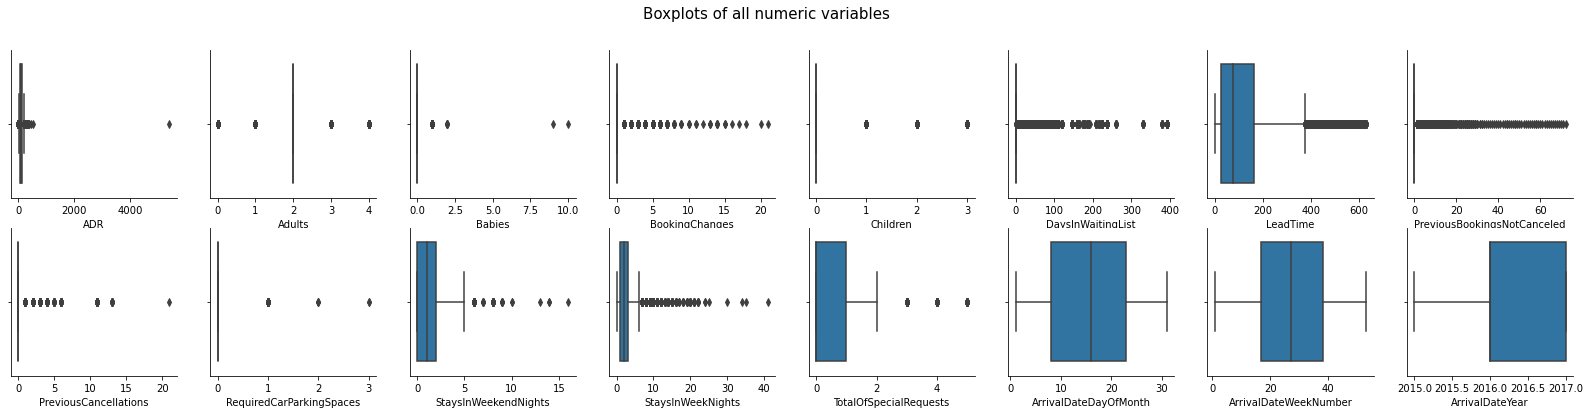

In [82]:
# BOXPLOT (ALL NUMERIC VARIABLES)

fig, ax = plt.subplots(2, 8, figsize=(28,6))
for var, subplot in zip(dataset[numerical], ax.flatten()):
    g = sns.boxplot(data=dataset,x=var,ax=subplot)

sns.despine()
plt.rc('axes', labelsize=10)
fig.suptitle("Boxplots of all numeric variables", fontsize=15);

The Outlier in the numerical feature are present especially in:
- ADR
- Babies
- DaysInWaitingList
- LeadTime
- PreviousBookingsNotCanceled.

We will apply for each of these variables a filter

In [83]:
filters = (
    (dataset['ADR']<=1000)
    &
    (dataset['Babies']<=5)
    &
    (dataset['DaysInWaitingList']<=300)
    &
    (dataset['LeadTime']<=500)
    &
    (dataset['PreviousBookingsNotCanceled']<=40)
)

df1 = dataset[filters]
print('Percentage of data kept after removing outliers:', np.round(df1.shape[0] / dataset.shape[0], 4))

Percentage of data kept after removing outliers: 0.9928


The % removed is under 5%, we will keep it

In [84]:
#Setting the new Dataframe after removed the outliers
df = df1.copy()

<a class="anchor" id="5.3">

## 5.3 Feature Engineering
    
</a>

### Summary of the variables added
- **IsPortugueseHoliday**: positive if there is at least 1 holiday in the customer stays
- **IsPortugueseHolidayArrival**: positive if the ArrivalDate is an holiday
- **Weather**: imported with an external dataset
- **Season** : rename the higher and lower seaso created in 4.3 respectively to 1 and 0 
- **Country**: we merged together some countries as their number of observation was really small
- **IsPortuges** (binary): Is the person coming from Portugal 
- **TotalNights** (int): What is total nights that person stayed in hotel 
- **HasWeekendStay** (binary): are there any days of that booking during weekend night 
- **LeadTimeCategory**: Categorical Lead time 
- **SameDayBooking** (binary) Booking that are made on the same day 
- **NightStayGroup** (categorical): Total night stays 

### Country

In [85]:
#Binary feature that differentiate if the person is from Portugal or not
df['IsPortuges'] = df['Country'].apply(lambda x: 1 if x == 'PRT' else 0)

In [86]:
# Replace missing values in the 'Country' column with 'Missing'
df['Country'].fillna('Missing', inplace=True)

In [87]:
#Merge all the countries that create less than 15% of bookings
country_bookings = df['Country'].value_counts().reset_index()
country_bookings.columns = ['Country', 'Bookings']
country_bookings['Percentage'] = (country_bookings['Bookings'] / country_bookings['Bookings'].sum()) * 100
countries_to_merge = country_bookings[country_bookings['Percentage'] < 10]['Country'].tolist()
df.loc[df['Country'].isin(countries_to_merge), 'Country'] = 'Others'

### Company

In [88]:
# Replace missing values in the 'Company' column with 'NoCompany'
df['Company'] = df['Company'].replace('NULL', 'NoCompany', regex=True)

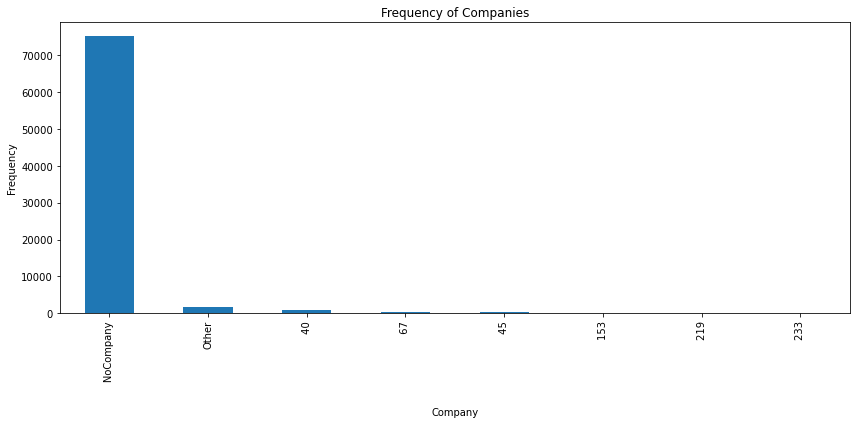

In [89]:
# Calculate value counts of the 'Company' column
company_counts = df['Company'].value_counts()

# Select the top 7 companies
top_companies = company_counts.nlargest(7).index.tolist()

# Replace companies not in the top 7 with 'Other'
df['Company'] = df['Company'].apply(lambda x: x if x in top_companies else 'Other')

# Plot the bar chart
plt.figure(figsize=(12, 6))
df['Company'].value_counts().plot(kind='bar')
plt.xlabel('Company')
plt.ylabel('Frequency')
plt.title('Frequency of Companies')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Agent 

In [90]:
# Replace missing values in the 'Agent' column with 'NoAgent'
df['Agent'] = df['Agent'].replace('NULL', 'No Agent', regex=True)

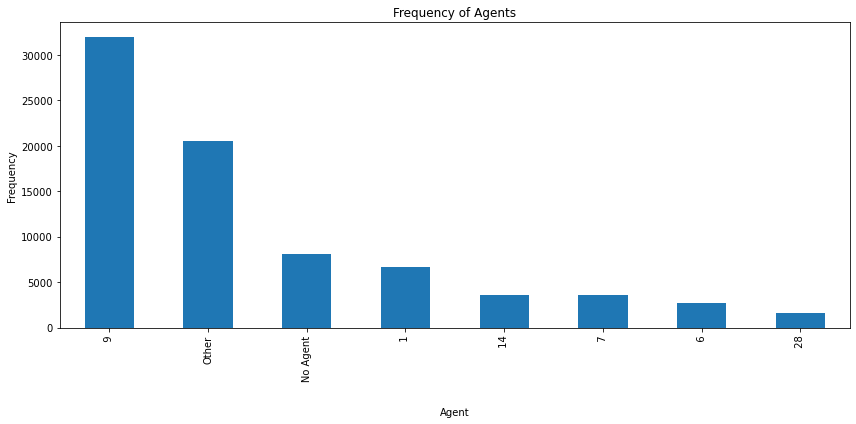

In [91]:
# Calculate value counts of the 'Agent' column
agent_counts = df['Agent'].value_counts()

# Select the top 7 agents
top_agents = agent_counts.nlargest(7).index.tolist()

# Replace agents not in the top 7 with 'Other'
df['Agent'] = df['Agent'].apply(lambda x: x if x in top_agents else 'Other')

# Plot the bar chart
plt.figure(figsize=(12, 6))
df['Agent'].value_counts().plot(kind='bar')
plt.xlabel('Agent')
plt.ylabel('Frequency')
plt.title('Frequency of Agents')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### LeadTime

In [92]:
# New feature that says if the booking was made on the same day as arrival
df['SameDayBooking'] = (df['LeadTime'] == 0).astype(int)

### TotalNights

In [93]:
# Create a new variable 'TotalNights' by summing 'StaysInWeekNights' and 'StaysInWeekendNights'
df['TotalNights'] = df['StaysInWeekNights'] + df['StaysInWeekendNights']

# Create a new binary variable 'HasWeekendStay' indicating if there is a weekend stay or not
df['HasWeekendStay'] = (df['StaysInWeekendNights'] > 0).astype(int)

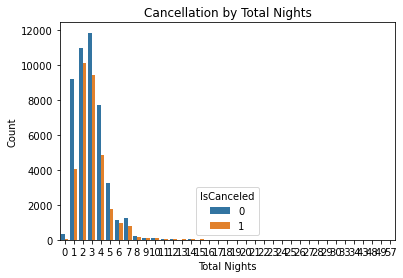

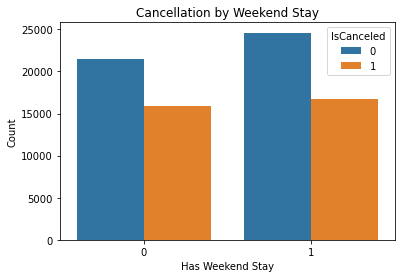

In [94]:
# Create a countplot to visualize the relationship between 'TotalNights' and 'IsCanceled'
sns.countplot(x='TotalNights', hue='IsCanceled', data=df)
plt.xlabel('Total Nights')
plt.ylabel('Count')
plt.title('Cancellation by Total Nights')
plt.show()

# Create a countplot to visualize the relationship between 'HasWeekendStay' and 'IsCanceled'
sns.countplot(x='HasWeekendStay', hue='IsCanceled', data=df)
plt.xlabel('Has Weekend Stay')
plt.ylabel('Count')
plt.title('Cancellation by Weekend Stay')
plt.show()

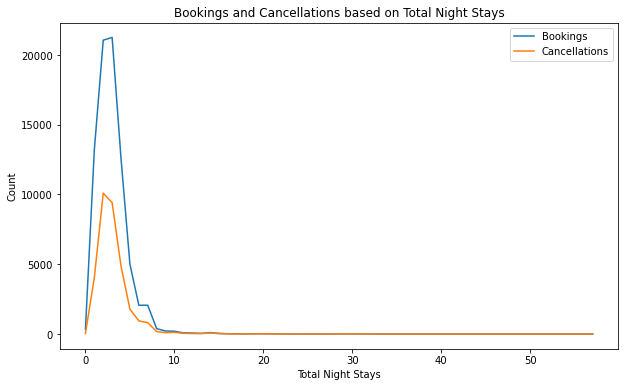

In [95]:
booking_counts = df.groupby('TotalNights')['IsCanceled'].count()
cancellation_counts = df.groupby('TotalNights')['IsCanceled'].sum()

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(booking_counts.index, booking_counts, label='Bookings')
plt.plot(cancellation_counts.index, cancellation_counts, label='Cancellations')

# Set plot labels and title
plt.xlabel('Total Night Stays')
plt.ylabel('Count')
plt.title('Bookings and Cancellations based on Total Night Stays')

# Add a legend
plt.legend()

# Show the plot
plt.show()

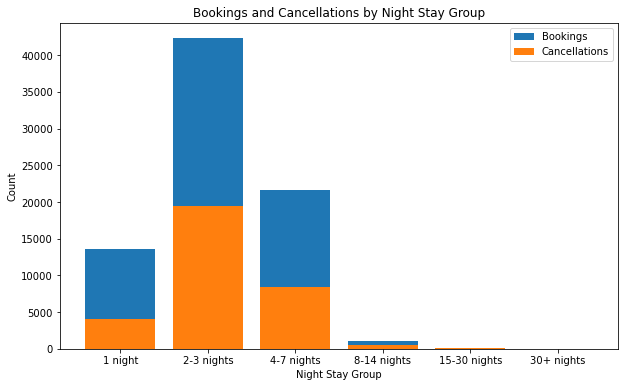

In [96]:
# Define the bin edges and labels for the groups
bin_edges = [0, 1, 3, 7, 14, 30, df['TotalNights'].max()]
bin_labels = ['1 night', '2-3 nights', '4-7 nights', '8-14 nights', '15-30 nights', '30+ nights']

# Create a new column 'NightStayGroup' with the group labels
df['NightStayGroup'] = pd.cut(df['TotalNights'], bins=bin_edges, labels=bin_labels, include_lowest=True)

# Group the data by night stay groups and calculate the count of bookings and cancellations
group_counts = df.groupby('NightStayGroup')['IsCanceled'].count()
group_cancellations = df.groupby('NightStayGroup')['IsCanceled'].sum()

# Create a bar plot to visualize the relationship between night stay groups and cancellations
plt.figure(figsize=(10, 6))
plt.bar(group_counts.index, group_counts, label='Bookings')
plt.bar(group_cancellations.index, group_cancellations, label='Cancellations')

# Set plot labels and title
plt.xlabel('Night Stay Group')
plt.ylabel('Count')
plt.title('Bookings and Cancellations by Night Stay Group')

# Add a legend
plt.legend()

# Show the plot
plt.show()

## Season

In [97]:
df['Season'] = df['Season'].apply(lambda x: 1 if x == 'Higher Season' else 0)

Finalise part 5.3 by adding the new features in the corresponding section (numerical or categorical)

In [98]:
#Update numerical & categorical
categorical.extend(('SameDayBooking','LeadTimeCategory','NightStayGroup','HasWeekendStay','IsPortuges','Season'))
numerical.append('TotalNights')

<a class="anchor" id="5.4">

## 5.4 Drop Features
    
</a>

- Country: Business related
- Assigned room type: Business related
- Reservation status: Business related
- IsPortuguese: Business related
- ArrivalDateDayOfMonth
- ArrivalDateYear
- SameDayBooking
- Babies
- HasWeekendStay
- Adults
- RequiredCarParkingSpaces
- DaysInWaitingList
- Children
- StaysInWeekendNights
- Weather
- DepositType: Business related

In [99]:
# adults, babies and children can't be zero at same time
df[(df['Adults']==0)&(df['Babies']==0)&(df['Children']==0)]

IsCanceled  LeadTime  ArrivalDateYear ArrivalDateMonth  \
332             0       132             2015             July   
862             0         0             2015           August   
960             0         0             2015           August   
996             0         0             2015           August   
2392            1         1             2015        September   
...           ...       ...              ...              ...   
74969           0       107             2017             June   
75031           0         1             2017             June   
76191           0        44             2017             July   
76474           0         2             2017             July   
77027           0       170             2017             July   

       ArrivalDateWeekNumber  ArrivalDateDayOfMonth  StaysInWeekendNights  \
332                       30                     23                     2   
862                       33                      9                     2   
960                       33                     10                     9   
996                       33                     11                     0   
2392                      37                      6                     2   
...                      ...                    ...                   ...   
74969                     26                     27                     0   
75031                     26                     30                     0   
76191                     28                     15                     1   
76474                     28                     15                     2   
77027                     30                     27                     0   

       StaysInWeekNights  Adults  Children  ...  Season ArrivalDateOrdinal  \
332                    5       0         0  ...       1             735802   
862                    0       0         0  ...       1             735819   
960                   20       0         0  ...       1             735820   
996                    4       0         0  ...       1             735821   
2392                   0       0         0  ...       1             735847   
...                  ...     ...       ...  ...     ...                ...   
74969                  3       0         0  ...       1             736507   
75031                  1       0         0  ...       1             736510   
76191                  1       0         0  ...       1             736525   
76474                  5       0         0  ...       1             736525   
77027                  2       0         0  ...       1             736537   

      ReservationStatusDateOrdinal Duration LeadTimeCategory  IsPortuges  \
332                         735809        7         60+ days           1   
862                         735821        2           0 days           0   
960                         735849       29           0 days           1   
996                         735825        4           0 days           1   
2392                        735846       -1           0 days           1   
...                            ...      ...              ...         ...   
74969                       736510        3         60+ days           0   
75031                       736511        1           0 days           1   
76191                       736527        2       31-60 days           0   
76474                       736532        7         1-7 days           0   
77027                       736539        2         60+ days           0   

       SameDayBooking  TotalNights HasWeekendStay NightStayGroup  
332                 0            7              1     4-7 nights  
862                 1            2              1     2-3 nights  
960                 1           29              1   15-30 nights  
996                 1            4              0     4-7 nights  
2392                0            2              1     2-3 nights  
...               ...          ...            ...

In [100]:
#There are 167 rows that have 0 adults, 0 children, and 0 babies.
#That makes around 0.2% of our original dataset so we decided to drop this rows

condition = (df['Adults']==0)&(df['Babies']==0)&(df['Children']==0)
rows_to_drop = df[condition].index
df = df.drop(rows_to_drop)

In [101]:
# Create a copy of the dataset
df_drop=df.copy()

In [102]:
# dropping this variables because they leek informations, we can only be sure about this if person checked in
drop_features = ['Country','AssignedRoomType','ReservationStatus', 'ReservationStatusDate','ArrivalDate',
                 'ReservationStatusDateOrdinal','ArrivalDateOrdinal', 'Duration', 'IsPortuges', 'ArrivalDateYear']
df=df.drop(columns=drop_features)

In [103]:
#Update Categorical & numerical Features List
categorical.remove('Country')
categorical.remove('AssignedRoomType')
categorical.remove('ReservationStatus')
categorical.remove('IsPortuges')
numerical.remove('ArrivalDateYear')

## Drop Features Based on Correlation

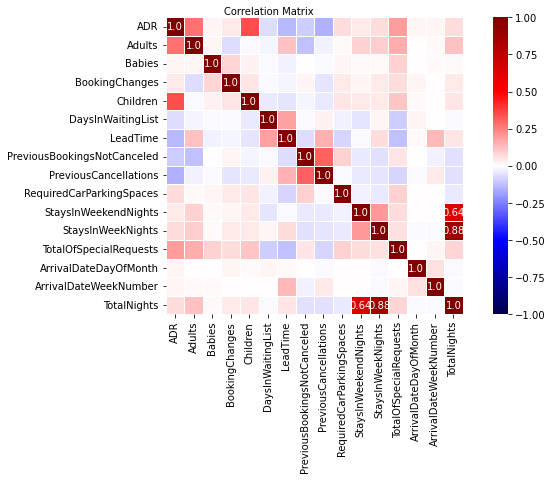

In [104]:
#Check if there are any correlated features. 
#Since we add new features is important to see again the correlations
fig = plt.figure(figsize = (11, 5))
corr = np.round(df[numerical].corr(), decimals = 2)
mask_annot = np.absolute(corr.values) >= 0.5
annot = np.where(mask_annot, corr.values, np.full(corr.shape,""))
sns.heatmap(data = corr, annot = annot, cmap = plt.cm.seismic, fmt = 's', vmin = -1, vmax = 1, center = 0, square = True, 
             linewidths = 0.5)
fig.subplots_adjust(top = 0.95)
fig.suptitle("Correlation Matrix", fontsize = 10)
plt.show()

From the model, the features that are high correlated with each others are:
- StaysInWeekNights
- TotalNight

We decide to remove StaysInWeekNights since more completed

The feature that is low correlated with all the others is:
- ArrivalDateDayOfMonth

In [105]:
# Dropping the features
df.drop(columns = ["StaysInWeekNights"],inplace = True)
df.drop(columns = ["ArrivalDateDayOfMonth"],inplace = True)
# Update Metric Features List
numerical.remove('StaysInWeekNights')
numerical.remove('ArrivalDateDayOfMonth')

## Chi Squared Test

In [106]:
pd.set_option('display.max_columns', None)

In [107]:
categorical_noIsCancelled = [item for item in categorical if item != 'IsCanceled']

In [108]:
#Built a function that tells us which categorical feature is important to predict the target
def TestIndependence(X,y,feature,alpha=0.05):        
    dfObserved = pd.crosstab(y,X) 
    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
    dfExpected = pd.DataFrame(expected, columns=dfObserved.columns, index = dfObserved.index)
    if p<alpha:
        result="{0} is IMPORTANT for Prediction".format(feature)
    else:
        result="{0} is NOT an important predictor. (Discard {0} from model)".format(feature)
    print(result)

for feature in df[categorical_noIsCancelled]:
    TestIndependence(df[categorical_noIsCancelled][feature],df['IsCanceled'], feature)

Agent is IMPORTANT for Prediction
ArrivalDateMonth is IMPORTANT for Prediction
Company is IMPORTANT for Prediction
CustomerType is IMPORTANT for Prediction
DepositType is IMPORTANT for Prediction
DistributionChannel is IMPORTANT for Prediction
IsRepeatedGuest is IMPORTANT for Prediction
MarketSegment is IMPORTANT for Prediction
Meal is IMPORTANT for Prediction
ReservedRoomType is IMPORTANT for Prediction
BookingsPerDate is IMPORTANT for Prediction
IsPortugueseHoliday is IMPORTANT for Prediction
IsPortugueseHolidayArrival is IMPORTANT for Prediction
Weather is NOT an important predictor. (Discard Weather from model)
SameDayBooking is IMPORTANT for Prediction
LeadTimeCategory is IMPORTANT for Prediction
NightStayGroup is IMPORTANT for Prediction
HasWeekendStay is IMPORTANT for Prediction
Season is IMPORTANT for Prediction


For business reasons we will also drop DepositType, as the variable was not collected correctly and it will not be helpful for business explanations. 

In [109]:
# Dropping the low relevant feature
df.drop(columns = ["Weather"],inplace = True)
df.drop(columns = ["DepositType"],inplace = True)

# Update Metric Features List
categorical.remove('Weather')
categorical.remove('DepositType')

## Lasso regression

In [110]:
numerical.append('ArrivalDateYear')

In [111]:
# Update Metric Features List
numerical.remove('ArrivalDateYear')

In [112]:
#Create a Lasso Regression and check the coefficients
#If a coefficients==0, we can discard this variable
reg = LassoCV()
reg.fit(df[numerical], df['IsCanceled'])
coef = pd.Series(reg.coef_, index = df[numerical].columns)
coef

ADR                            0.000976
Adults                         0.000000
Babies                         0.000000
BookingChanges                -0.063687
Children                      -0.000000
DaysInWaitingList             -0.000179
LeadTime                       0.001298
PreviousBookingsNotCanceled   -0.003822
PreviousCancellations          0.066935
RequiredCarParkingSpaces      -0.000000
StaysInWeekendNights          -0.000000
TotalOfSpecialRequests        -0.140769
ArrivalDateWeekNumber         -0.001259
TotalNights                    0.007541
dtype: float64

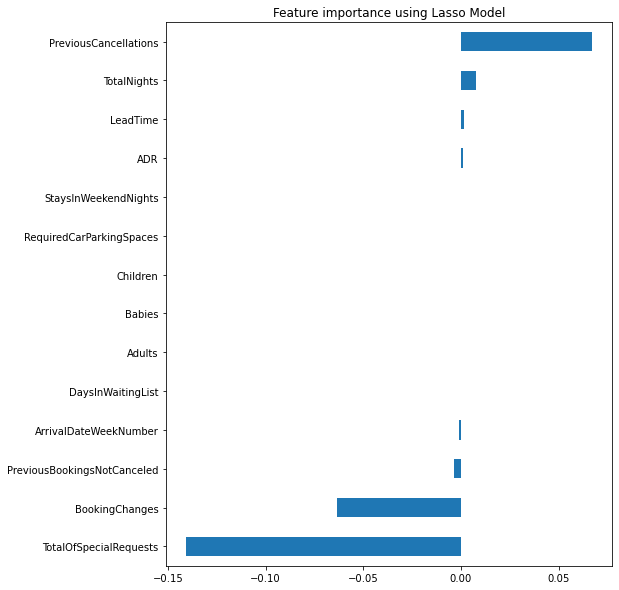

In [113]:
#Plot feature Importance
def plot_importance(coef,name):
    imp_coef = coef.sort_values()
    plt.figure(figsize=(8,10))
    imp_coef.plot(kind = "barh")
    plt.title("Feature importance using " + name + " Model")
    plt.show()
plot_importance(coef,'Lasso')

Feature to remove accordingly to Lasso:
- StaysInWeekendNights
- RequiredCarParkingSpaces
- Children
- Babies
- Adults
- DaysInWaitingList

## Decision Tree

In [114]:
#create 2 models of Decision Tree
gini_importance = DecisionTreeClassifier().fit(df[numerical], df['IsCanceled']).feature_importances_
entropy_importance = DecisionTreeClassifier(criterion ='entropy').fit(df[numerical], df['IsCanceled']).feature_importances_

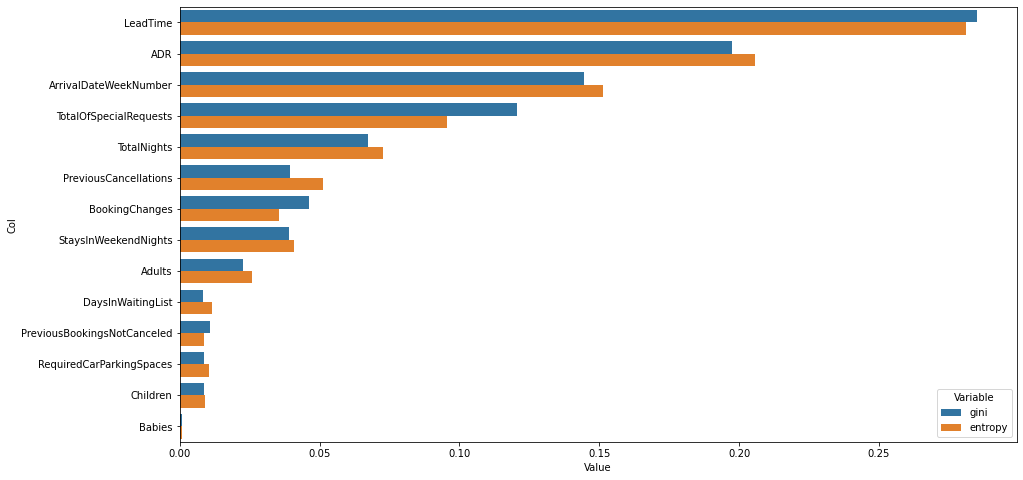

In [115]:
#Create a visualization where we can see the importance of each feature
#Usually features with values above or equal 0.05 we can discard 
zippy = pd.DataFrame(zip(gini_importance,entropy_importance), columns = ['gini','entropy'])
zippy['col'] = df[numerical].columns
tidy = zippy.melt(id_vars='col').rename(columns=str.title)
tidy.sort_values(['Value'], ascending = False, inplace = True)

plt.figure(figsize=(15,8))
sns.barplot(y='Col', x='Value', hue='Variable', data=tidy)
plt.show()

Feature to remove accordingly to DT:
- Babies
- Children
- RequiredCarParkingSpaces
- **PreviousBookingsNotCanceled**
- DaysInWaitingList
- Adults
- StaysInWeekendNights
- **BookingChanges**

Note: these are all the same as lasso except for 'PreviousBookingsNotCanceled' and 'BookingChanges'

In [116]:
# dropping this variables because both suggested by Lasso and DT, with StaysInWeekendNights
drop_features = ['Babies', 'Adults','RequiredCarParkingSpaces',
                 'DaysInWaitingList','Children', 'StaysInWeekendNights']
df=df.drop(columns=drop_features)

In [117]:
#Update Categorical Features List
numerical.remove('Babies')
numerical.remove('Adults')
numerical.remove('RequiredCarParkingSpaces')
numerical.remove('DaysInWaitingList')
numerical.remove('Children')
numerical.remove('StaysInWeekendNights')

<a class="anchor" id="5.5">

## 5.6 One Hot Encoding
    
</a>

In [118]:
categorical = [e for e in categorical if e not in ('IsCanceled','IsRepeatedGuest',
                                                   'IsPortugueseHoliday','IsPortugueseHolidayArrival',
                                                   'SameDayBooking', 'Season')]

In [119]:
# Create dummies variables for categorical variables
df_cat = pd.get_dummies(df[categorical])

# Drop categorical variables from original dataset
df=df.drop(categorical, axis=1)

# Join dummies variables with original dataset
df=df.join(df_cat)

In [120]:
df

IsCanceled  LeadTime  ArrivalDateWeekNumber  IsRepeatedGuest  \
0               0         6                     27                0   
1               1        88                     27                0   
2               1        65                     27                0   
3               1        92                     27                0   
4               1       100                     27                0   
...           ...       ...                    ...              ...   
79325           0        23                     35                0   
79326           0       102                     35                0   
79327           0        34                     35                0   
79328           0       109                     35                0   
79329           0       205                     35                0   

       PreviousCancellations  PreviousBookingsNotCanceled  BookingChanges  \
0                          0                            0               0   
1                          0                            0               0   
2                          0                            0               0   
3                          0                            0               0   
4                          0                            0               0   
...                      ...                          ...             ...   
79325                      0                            0               0   
79326                      0                            0               0   
79327                      0                            0               0   
79328                      0                            0               0   
79329                      0                            0               0   

          ADR  TotalOfSpecialRequests  IsPortugueseHoliday  \
0        0.00                       0                    1   
1       76.50                       1                    1   
2       68.00                       1                    1   
3       76.50                       2                    1   
4       76.50                       1                    1   
...       ...                     ...                  ...   
79325   96.14                       0                    1   
79326  225.43                       2                    1   
79327  157.71                       4                    1   
79328  104.40                       0                    1   
79329  151.20                       2                    1   

       IsPortugueseHolidayArrival  Season  SameDayBooking  TotalNights  \
0                               0       1               0            2   
1                               0       1               0            4   
2                               0       1               0            4   
3                               0       1               0            6   
4                               0       1               0            2   
...                           ...     ...             ...          ...   
79325                           0       1               0            7   
79326                           0       1               0            7   
79327                           0       1               0            7   
79328                           0       1               0            7   
79329                           0       1               0            9   

       BookingsPerDate  HasWeekendStay  Agent_          1  Agent_          6  \
0                   79               0                  0                  1   
1                   79               0                  0                  0   
2                   79               0                  0                  0   
3                   79               1                  0                  0   
4                   49               0                  0                  0   
...                ...             ...                ...                ...   
79325               47             

<a class="anchor" id="6">

# 6. Modelling
    
</a>

## Training, Validation and Test Sets

We divide the dataset in:
- Training: 70%
- Validation: 20%
- Test: 10%

In [121]:
# Defining the target variable
X = df.drop('IsCanceled', axis=1)
y = df['IsCanceled']

In [122]:
# Splitting the data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y, shuffle=True)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=1/3, random_state=0, stratify=y_test, shuffle=True)

Counter({0: 32191, 1: 22825})
0    0.585121
1    0.414879
Name: IsCanceled, dtype: float64


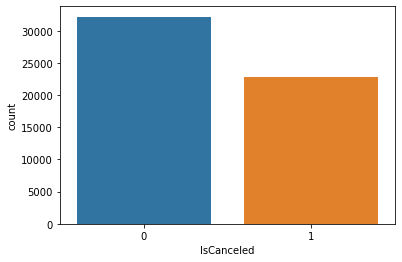

In [123]:
# Display target balance in the training dataset
print(collections.Counter(y_train))
fig, ax = plt.subplots(figsize=(6,4))
sns.countplot(x="IsCanceled", data=pd.DataFrame(data={'IsCanceled':y_train}), ax=ax)
print(y_train.value_counts(normalize=True))

In [124]:
# Function to obtain metrics
def metrics(y_train, pred_train, y_val, pred_val, y_test, pred_test, name):
    print('____________________________________________ ', name, ' ____________________________________________')
    print('___________________________________________________________________________________________________________')
    print('___________________________________________________________________________________________________________')
    print('                                                     TRAIN                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_train, pred_train))
    print(confusion_matrix(y_train, pred_train))

    print('___________________________________________________________________________________________________________')
    print('                                                VALIDATION                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_val, pred_val))
    print(confusion_matrix(y_val, pred_val))

    print('___________________________________________________________________________________________________________')
    print('                                                  TEST                                                     ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_test, pred_test))
    print(confusion_matrix(y_test, pred_test))

In [125]:
#metrics(y_train, train_pred, y_val, val_pred, y_test, pred_test, "Model")

<a class="anchor" id="6.1">

## 6.1 Logistic Regression
    
</a>

In [126]:
# Before running Logistic regression model we need to normalite the data
scaler = MinMaxScaler().fit(X_train)

# Scale the training and the test sets
X_train_scaled = scaler.transform(X_train) # this will return an array
X_test_scaled = scaler.transform(X_test)

# Convert the array to a pandas dataframe
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns).set_index(X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_train.columns)
X_val = pd.DataFrame(X_val, columns=X_train.columns)

X_test_scaled.head(3)

LeadTime  ArrivalDateWeekNumber  IsRepeatedGuest  PreviousCancellations  \
0  0.292339               0.519231              0.0                    0.0   
1  0.346774               0.653846              0.0                    0.0   
2  0.106855               0.538462              0.0                    0.0   

   PreviousBookingsNotCanceled  BookingChanges       ADR  \
0                          0.0             0.0  0.000000   
1                          0.0             0.0  0.237209   
2                          0.0             0.0  0.229236   

   TotalOfSpecialRequests  IsPortugueseHoliday  IsPortugueseHolidayArrival  \
0                     0.2                  1.0                         0.0   
1                     0.2                  1.0                         0.0   
2                     0.0                  1.0                         0.0   

   Season  SameDayBooking  TotalNights  BookingsPerDate  HasWeekendStay  \
0     1.0             0.0     0.000000         0.203593             0.0   
1     1.0             0.0     0.062500         0.323353             1.0   
2     1.0             0.0     0.041667         0.209581             1.0   

   Agent_          1  Agent_          6  Agent_          7  Agent_          9  \
0                0.0                0.0                0.0                0.0   
1                0.0                1.0                0.0                0.0   
2                0.0                0.0                0.0                1.0   

   Agent_         14  Agent_         28  Agent_       No Agent  Agent_Other  \
0                0.0                1.0                    0.0          0.0   
1                0.0                0.0                    0.0          0.0   
2                0.0                0.0                    0.0          0.0   

   ArrivalDateMonth_April  ArrivalDateMonth_August  ArrivalDateMonth_December  \
0                     0.0                      0.0                        0.0   
1                     0.0                      1.0                        0.0   
2                     0.0                      0.0                        0.0   

   ArrivalDateMonth_February  ArrivalDateMonth_January  ArrivalDateMonth_July  \
0                        0.0                       0.0                    1.0   
1                        0.0                       0.0                    0.0   
2                        0.0                       0.0                    1.0   

   ArrivalDateMonth_June  ArrivalDateMonth_March  ArrivalDateMonth_May  \
0                    0.0                     0.0                   0.0   
1                    0.0                     0.0                   0.0   
2                    0.0                     0.0                   0.0   

   ArrivalDateMonth_November  ArrivalDateMonth_October  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   

   ArrivalDateMonth_September  Company_         40  Company_         45  \
0                         0.0                  0.0                  0.0   
1                         0.0                  0.0                  0.0   
2                         0.0                  0.0                  0.0   

   Company_         67  Company_        153  Company_        219  \
0                  0.0                  0.0                  0.0   
1                  0.0                  0.0                  0.0   
2                  0.0                  0.0                  0.0   

   Company_        233  Company_       NoCompany  Company_Other  \
0                  0.0                       1.0            0.0   
1                  0.0                       1.0            0.0   
2                  0.0                       1.0            0.0   

   CustomerType_Contract  CustomerType_Group  CustomerType_Transient  \
0                    0.0                 0.0                     0.0   
1                    0.0  

In [127]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [128]:
# Predictions
train_pred = log_model.predict(X_train_scaled)
val_pred = log_model.predict(X_val)
pred_test = log_model.predict(X_test_scaled)

In [129]:
#Results
metrics(y_train, train_pred, y_val, val_pred, y_test, pred_test, "LOGISTIC REGRESSION")

____________________________________________  LOGISTIC REGRESSION  ____________________________________________
___________________________________________________________________________________________________________
___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.80      0.86      0.83     32191
           1       0.78      0.69      0.73     22825

    accuracy                           0.79     55016
   macro avg       0.79      0.77      0.78     55016
weighted avg       0.79      0.79      0.79     55016

[[27667  4524]
 [ 7131 15694]]
__________________________________________________________________________________________________

<a class="anchor" id="6.2">

## 6.2 ADA Boost Classifier
    
</a>

In the case of this model, it was essential to set the parameter max_depth=3 for the dtc decision tree in order to avoid excessive depth and the occurrence of overfitting.

In [130]:
# Define the base classifier
dtc = DecisionTreeClassifier(max_depth = 3)

# Create the AdaBoost classifier with dtc as the base estimator
ada = AdaBoostClassifier(base_estimator= dtc)
ada.fit(X_train_scaled, y_train)

# Predictions
train_pred_ada = ada.predict(X_train_scaled)
val_pred_ada = ada.predict(X_val)
test_pred_ada = ada.predict(X_test_scaled)

# Calculate the metrics
train_acc_ada = accuracy_score(y_train, train_pred_ada)
val_acc_ada = accuracy_score(y_val, val_pred_ada)
test_acc_ada = accuracy_score(y_test, test_pred_ada)

train_conf_ada = confusion_matrix(y_train, train_pred_ada)
val_conf_ada = confusion_matrix(y_val, val_pred_ada)
test_conf_ada = confusion_matrix(y_test, test_pred_ada)

train_report_ada = classification_report(y_train, train_pred_ada)
val_report_ada = classification_report(y_val, val_pred_ada)
test_report_ada = classification_report(y_test, test_pred_ada)

# Results
metrics(y_train, train_pred_ada, y_val, val_pred_ada, y_test, test_pred_ada, "ADA BOOST CLASSIFIER")

____________________________________________  ADA BOOST CLASSIFIER  ____________________________________________
___________________________________________________________________________________________________________
___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.89      0.85     32191
           1       0.82      0.73      0.77     22825

    accuracy                           0.82     55016
   macro avg       0.82      0.81      0.81     55016
weighted avg       0.82      0.82      0.82     55016

[[28644  3547]
 [ 6206 16619]]
_________________________________________________________________________________________________

<a class="anchor" id="6.3">

## 6.3 XG Boost Classifier
    
</a>

### XG Boost with Not Scaled data:

It seems better compare to the one with scaled data.

In [131]:
# Training the XGBoost classifier
xgb = XGBClassifier(booster='gbtree', learning_rate=0.1, max_depth=5, n_estimators=180)
xgb.fit(X_train, y_train)

# Predictions
train_pred_xg = xgb.predict(X_train)
val_pred_xg = xgb.predict(X_val)
test_pred_xg = xgb.predict(X_test)

# Calculating metrics
train_acc_xg = accuracy_score(y_train, train_pred)
val_acc_xg = accuracy_score(y_val, val_pred)
test_acc__xg = accuracy_score(y_test, pred_test)

train_conf_xg = confusion_matrix(y_train, train_pred_xg)
val_conf_xg = confusion_matrix(y_val, val_pred_xg)
test_conf_xg = confusion_matrix(y_test, test_pred_xg)

train_report_xg = classification_report(y_train, train_pred_xg)
val_report_xg = classification_report(y_val, val_pred_xg)
test_report_xg = classification_report(y_test, test_pred_xg)

# Printing metrics
metrics(y_train, train_pred_xg, y_val, val_pred_xg, y_test, test_pred_xg, "XG BOOST CLASSIFIER")

____________________________________________  XG BOOST CLASSIFIER  ____________________________________________
___________________________________________________________________________________________________________
___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.92      0.87     32191
           1       0.87      0.72      0.79     22825

    accuracy                           0.84     55016
   macro avg       0.85      0.82      0.83     55016
weighted avg       0.84      0.84      0.84     55016

[[29662  2529]
 [ 6364 16461]]
__________________________________________________________________________________________________

### XG Boost with Scaled data:

In [132]:
# Training the XGBoost classifier
xgb = XGBClassifier(booster='gbtree', learning_rate=0.1, max_depth=5, n_estimators=180)
xgb.fit(X_train_scaled, y_train)

# Predictions
train_pred_xg = xgb.predict(X_train_scaled)
val_pred_xg = xgb.predict(X_val)
test_pred_xg = xgb.predict(X_test_scaled)

# Calculating metrics
train_acc_xg = accuracy_score(y_train, train_pred)
val_acc_xg = accuracy_score(y_val, val_pred)
test_acc__xg = accuracy_score(y_test, pred_test)

train_conf_xg = confusion_matrix(y_train, train_pred_xg)
val_conf_xg = confusion_matrix(y_val, val_pred_xg)
test_conf_xg = confusion_matrix(y_test, test_pred_xg)

train_report_xg = classification_report(y_train, train_pred_xg)
val_report_xg = classification_report(y_val, val_pred_xg)
test_report_xg = classification_report(y_test, test_pred_xg)

# Printing metrics
metrics(y_train, train_pred_xg, y_val, val_pred_xg, y_test, test_pred_xg, "XG BOOST CLASSIFIER")

____________________________________________  XG BOOST CLASSIFIER  ____________________________________________
___________________________________________________________________________________________________________
___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.92      0.87     32191
           1       0.87      0.72      0.79     22825

    accuracy                           0.84     55016
   macro avg       0.85      0.82      0.83     55016
weighted avg       0.84      0.84      0.84     55016

[[29662  2529]
 [ 6364 16461]]
__________________________________________________________________________________________________

In [133]:
# CROSS-VALIDATION FOR XG BOOST

# Define the model
xgb = XGBClassifier(booster='gbtree', learning_rate=0.1, max_depth=5, n_estimators=180)

# Do cross-validation incrociata with 5 fold
cv_scores = cross_val_score(xgb, X_train, y_train, cv=5)

# Calculate the mean
mean_cv_score = cv_scores.mean()

print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", mean_cv_score)

Cross-Validation Scores: [0.83178844 0.83131873 0.82550214 0.83468145 0.8280469 ]
Mean Cross-Validation Score: 0.8302675308835669


### XG BOOST WITH OVERSAMPLING AND NO SCALED DATA

Counter({0: 32191, 1: 22825})
0    0.585121
1    0.414879
Name: IsCanceled, dtype: float64


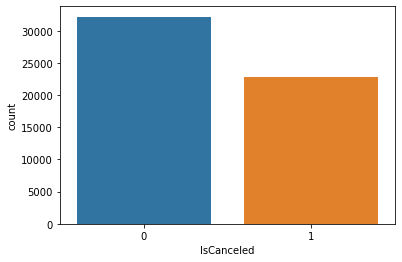

In [134]:
# Display target balance in the training dataset
print(collections.Counter(y_train))
fig, ax = plt.subplots(figsize=(6,4))
sns.countplot(x="IsCanceled", data=pd.DataFrame(data={'IsCanceled':y_train}), ax=ax)
print(y_train.value_counts(normalize=True))

Counter({0: 32191, 1: 32191})


<AxesSubplot:xlabel='IsCanceled', ylabel='count'>

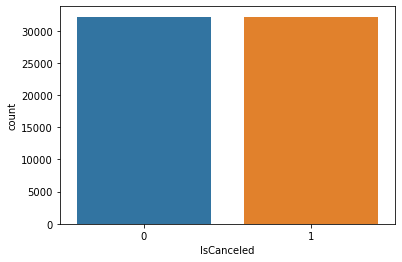

In [135]:
# Applying SMOTE to generate new instances (oversampling)
sm = SMOTE(random_state=123, sampling_strategy=1.0)
X_train2, y_train2 = sm.fit_resample(X_train, y_train)

# Display target balance in the training dataset
print(collections.Counter(y_train2))
fig, ax = plt.subplots(figsize=(6, 4))
sns.countplot(x="IsCanceled", data=pd.DataFrame(data={'IsCanceled': y_train2}), ax=ax)

In [136]:
# Training the XGBoost classifier
xgb = XGBClassifier(booster='gbtree', learning_rate=0.1, max_depth=5, n_estimators=180)
xgb.fit(X_train2, y_train2)

# Predictions
train_pred_xg = xgb.predict(X_train2)
val_pred_xg = xgb.predict(X_val)
test_pred_xg = xgb.predict(X_test)

# Calculating metrics
train_acc_xg = accuracy_score(y_train2, train_pred_xg)
val_acc_xg = accuracy_score(y_val, val_pred_xg)
test_acc_xg = accuracy_score(y_test, test_pred_xg)

train_conf_xg = confusion_matrix(y_train2, train_pred_xg)
val_conf_xg = confusion_matrix(y_val, val_pred_xg)
test_conf_xg = confusion_matrix(y_test, test_pred_xg)

train_report_xg = classification_report(y_train2, train_pred_xg)
val_report_xg = classification_report(y_val, val_pred_xg)
test_report_xg = classification_report(y_test, test_pred_xg)

# Printing metrics
metrics(y_train2, train_pred_xg, y_val, val_pred_xg, y_test, test_pred_xg, "XG BOOST CLASSIFIER")


____________________________________________  XG BOOST CLASSIFIER  ____________________________________________
___________________________________________________________________________________________________________
___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.91      0.86     32191
           1       0.90      0.80      0.85     32191

    accuracy                           0.85     64382
   macro avg       0.86      0.85      0.85     64382
weighted avg       0.86      0.85      0.85     64382

[[29166  3025]
 [ 6355 25836]]
__________________________________________________________________________________________________

We can see that using oversampling to balance class 0 did not lead to any particular improvements in the metrics of the XG Boost model. 

<a class="anchor" id="6.4">

## 6.4 Random Forest
    
</a>

In [137]:
#Model with strandard parameters
# Fit
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

# Prediction
train_pred_rf = model_rf.predict(X_train)
val_pred_rf = model_rf.predict(X_val)
test_pred_rf = model_rf.predict(X_test) 

# Results
metrics(y_train, train_pred_rf, y_val, val_pred_rf, y_test, test_pred_rf, "Random Forest")

____________________________________________  Random Forest  ____________________________________________
___________________________________________________________________________________________________________
___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     32191
           1       0.99      0.98      0.99     22825

    accuracy                           0.99     55016
   macro avg       0.99      0.99      0.99     55016
weighted avg       0.99      0.99      0.99     55016

[[32030   161]
 [  375 22450]]
________________________________________________________________________________________________________

In [138]:
#HyperParametrer optimization
n_estimators = [5,10,50,100,150,200] # number of trees in the random forest
max_depth = [int(x) for x in np.linspace(10, 100, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

In [139]:
random_grid = {'n_estimators': n_estimators,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

rf = RandomForestClassifier()

In [140]:
rf_random = RandomizedSearchCV(estimator = rf,
                               param_distributions = random_grid,
                               n_iter = 50, 
                               cv = 3, 
                               verbose=2, 
                               random_state=35, 
                               n_jobs = -1)

In [141]:
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 18, 26, 34, 42, 50,
                                                      59, 67, 75, 83, 91, 100],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [5, 10, 50, 100, 150,
                                                         200]},
                   random_state=35, verbose=2)

In [142]:
print ('Random grid: ', random_grid, '\n')
# print the best parameters
print ('Best Parameters: ', rf_random.best_params_, ' \n')

Random grid:  {'n_estimators': [5, 10, 50, 100, 150, 200], 'max_depth': [10, 18, 26, 34, 42, 50, 59, 67, 75, 83, 91, 100], 'min_samples_split': [2, 6, 10], 'min_samples_leaf': [1, 3, 4], 'bootstrap': [True, False]} 

Best Parameters:  {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 67, 'bootstrap': False}  



In [143]:
#RF with improved parameters
# Fit
model_rf2 = RandomForestClassifier(n_estimators=300, min_samples_split=6, min_samples_leaf=1, max_depth=200, bootstrap=False)
model_rf2.fit(X_train, y_train)

# Prediction
train_pred_rf = model_rf2.predict(X_train)
val_pred_rf = model_rf2.predict(X_val)
test_pred_rf2 = model_rf2.predict(X_test) 

# Results
metrics(y_train, train_pred_rf, y_val, val_pred_rf, y_test, test_pred_rf2, "Random Forest")

____________________________________________  Random Forest  ____________________________________________
___________________________________________________________________________________________________________
___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     32191
           1       0.99      0.97      0.98     22825

    accuracy                           0.99     55016
   macro avg       0.99      0.98      0.98     55016
weighted avg       0.99      0.99      0.99     55016

[[31973   218]
 [  586 22239]]
________________________________________________________________________________________________________

<a class="anchor" id="6.5">

## 6.5 Gradient Boosted Decision Tree
</a>

In [144]:
# Fit
model_gb = GradientBoostingClassifier(n_estimators=200)
model_gb.fit(X_train, y_train)

# Prediction
train_pred_gb = model_gb.predict(X_train)
val_pred_gb = model_gb.predict(X_val)
test_pred_gb = model_gb.predict(X_test) 

# Results
metrics(y_train, train_pred_gb, y_val, val_pred_gb, y_test, test_pred_gb, "Gradient Boosted DT")

____________________________________________  Gradient Boosted DT  ____________________________________________
___________________________________________________________________________________________________________
___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.81      0.91      0.86     32191
           1       0.85      0.69      0.76     22825

    accuracy                           0.82     55016
   macro avg       0.83      0.80      0.81     55016
weighted avg       0.82      0.82      0.82     55016

[[29341  2850]
 [ 7054 15771]]
__________________________________________________________________________________________________

<a class="anchor" id="6.6">

## 6.6 Support Vector Machine
</a>

In [145]:
# Model Training and Prediction
model_svm = svm.SVC(kernel='linear').fit(X_train, y_train)
train_pred_svm = model_svm.predict(X_train)
val_pred_svm = model_svm.predict(X_val)
test_pred_svm = model_svm.predict(X_test) 

# Results
metrics(y_train, train_pred_svm, y_val, val_pred_svm, y_test, test_pred_svm, "SVM")

____________________________________________  SVM  ____________________________________________
___________________________________________________________________________________________________________
___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.80      0.85      0.83     32191
           1       0.77      0.71      0.74     22825

    accuracy                           0.79     55016
   macro avg       0.79      0.78      0.78     55016
weighted avg       0.79      0.79      0.79     55016

[[27345  4846]
 [ 6628 16197]]
___________________________________________________________________________________________________________
      

In [146]:
recall_score(y_test, test_pred_svm)

0.712358172339773

<a class="anchor" id="6.7">

## 6.7 Best Model Selection
</a>

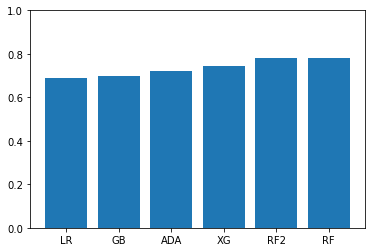

In [147]:
accuracies = [recall_score(y_test, pred_test), 
              recall_score(y_test, test_pred_ada), 
              recall_score(y_test, test_pred_xg),
              recall_score(y_test, test_pred_rf), 
              recall_score(y_test, test_pred_rf2), 
              recall_score(y_test, test_pred_gb)]
models = ['LR','ADA','XG','RF','RF2','GB']
data_tuples = list(zip(models,accuracies))
data = pd.DataFrame(data_tuples)
data = data.sort_values(1)
plt.bar(data[0], data[1])
plt.ylim(0,1)
plt.show()

### K-Folds Cross Validation

In [148]:
#KFolds with Random forest model
kf = KFold(n_splits=10)
def avg_score_RF(split_method,X,y):
    score_train = []
    score_test = []
    for train_index, test_index in split_method.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        model = RandomForestClassifier(n_estimators=300, min_samples_split=6, min_samples_leaf=1, max_depth=200, bootstrap=False).fit(X_train, y_train)
        value_train =  recall_score(y_train, model.predict(X_train))
        value_test =  recall_score(y_test, model.predict(X_test))
        score_train.append(value_train)
        score_test.append(value_test)
    
    print('Training recall score for each model:', score_train)
    print('\nTest recall score for each model:', score_test)
    print('\nAverage test recall score :', sum(score_test)/len(score_test))

In [149]:
model=avg_score_RF(kf, X, y)

Training recall score for each model: [0.980242799333492, 0.9726091354758385, 0.9730719690871035, 0.9692916885530729, 0.9703568161024703, 0.9763353617308993, 0.979222293834208, 0.9785896138155271, 0.9789857962389177, 0.9785922404539181]

Test recall score for each model: [0.2942830365510778, 0.3478134955111497, 0.12506439979392067, 0.2739534291894643, 0.6931667613098618, 0.9380245319561007, 0.2, 0.14285714285714285, 0.2727272727272727, 0.0]

Average test recall score : 0.328789006989599


As K-Fold didn't improve our results, we will use ordinary Random Forest model.

<a class="anchor" id="7">

# 7. Results
    
</a>

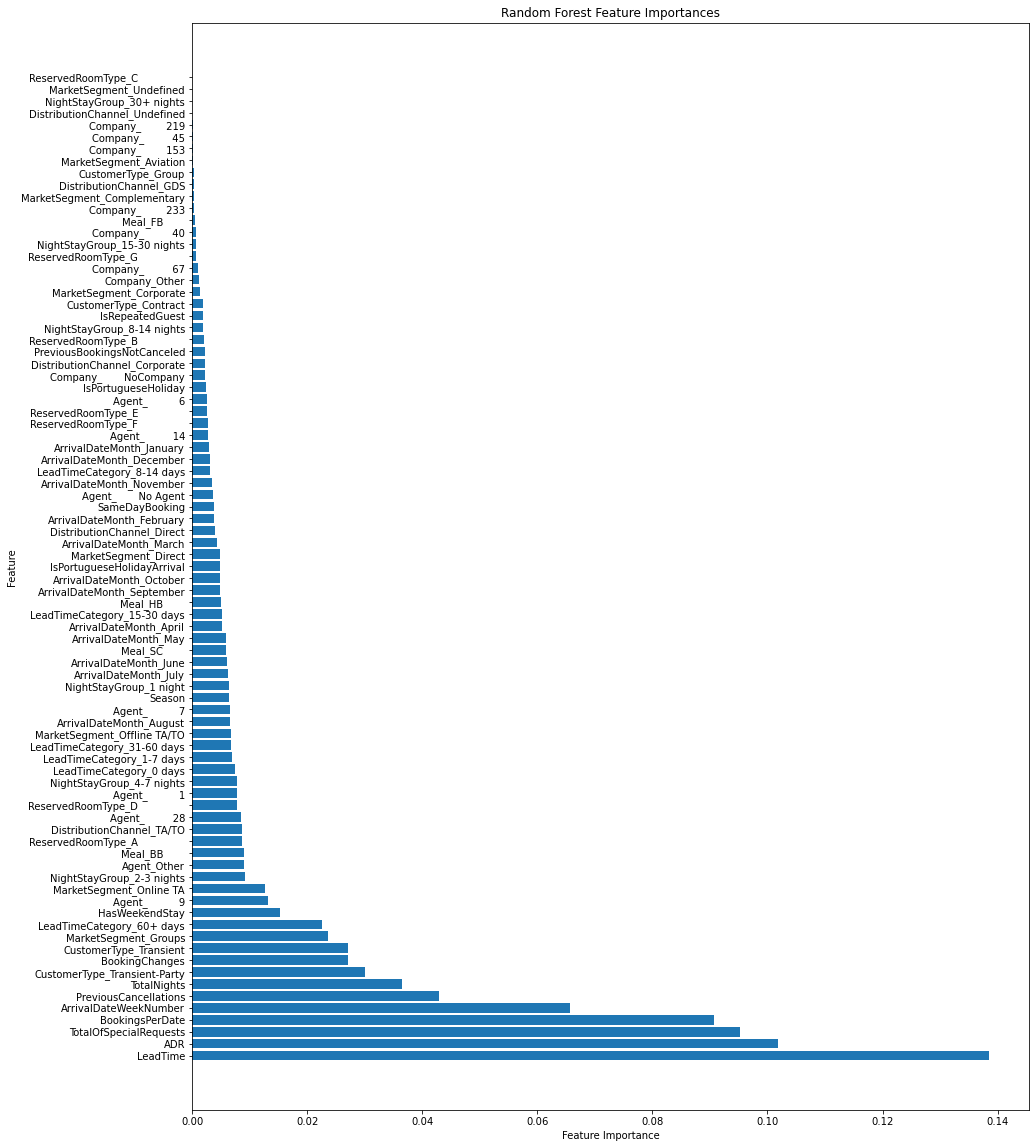

In [150]:
# Assuming you have a trained random forest model named "rf_classifier"
feature_importances = model_rf.feature_importances_
feature_names = X_train.columns.values

# Sort the feature importances in descending order
sorted_indices = feature_importances.argsort()[::-1]
sorted_indices = sorted_indices.astype(int)  # Convert to integer data type
sorted_feature_importances = feature_importances[sorted_indices]
sorted_feature_names = [feature_names[i] for i in sorted_indices]

# Plot the feature importances
plt.figure(figsize=(15, 20))
plt.barh(range(len(sorted_feature_importances)), sorted_feature_importances, align='center')
plt.yticks(range(len(sorted_feature_importances)), sorted_feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importances')
plt.show()

From the graph above we can asses what features are most relevant in our final model as they have the most relevant score:
- LeadTime
- ADR
- TotalofSpecialRequests 
- BookingsPerDate 
- ArrivalDateWeekNumber
- PreviousCancellations  

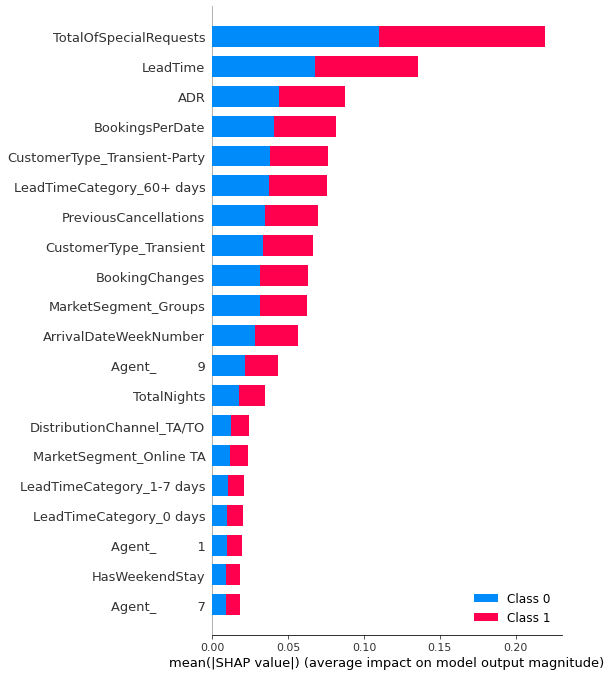

In [151]:
# Creating Shap (with approximation)
explainer = shap.TreeExplainer(model_rf, feature_perturbation="tree_path_dependent")
shap_values = explainer.shap_values(X_train, approximate=True, check_additivity=False)

# Plot the SHAP values
shap.summary_plot(shap_values, X_train)

Shap method give us similar results in the feature's importance plot. The features with more impact are in descending order:
- TotalofSpecialRequests
- LeadTime
- CostumerType_Transient 
- ADR 
- LeadTimeCategory_60+ days

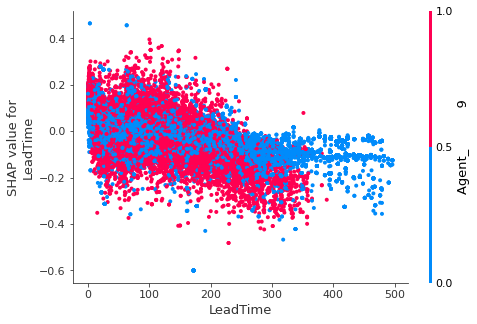

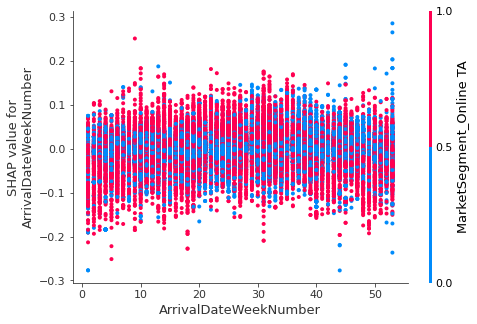

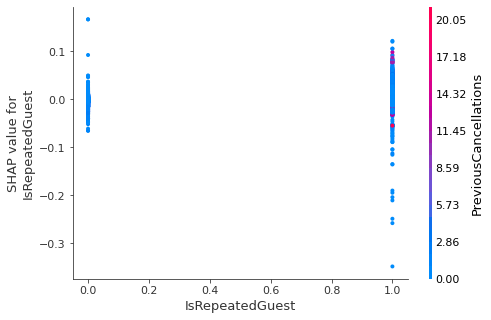

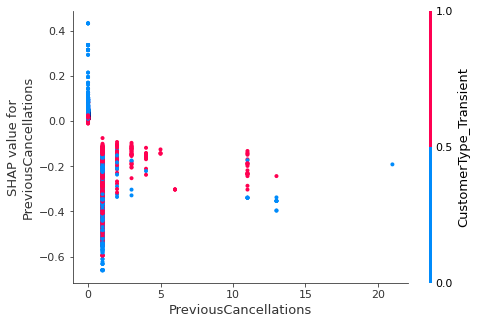

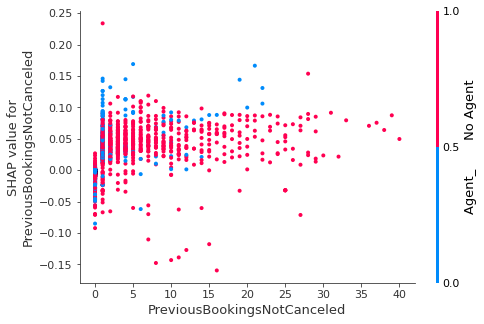

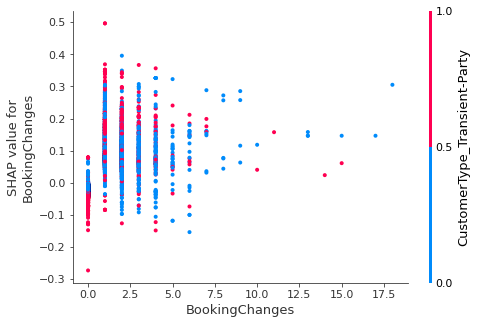

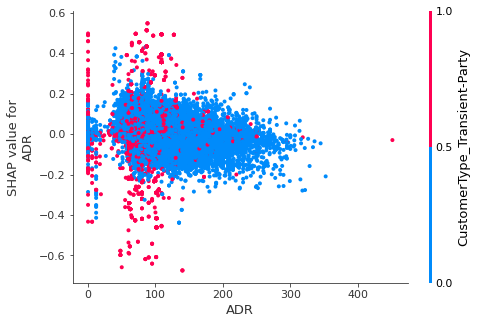

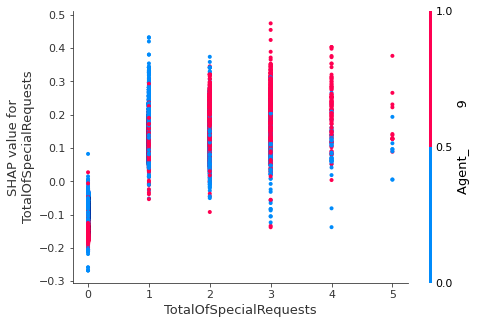

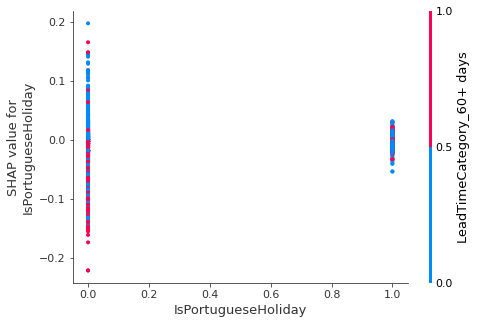

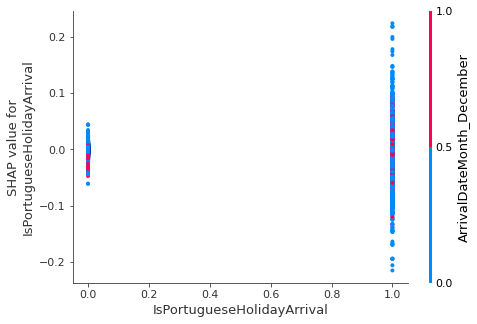

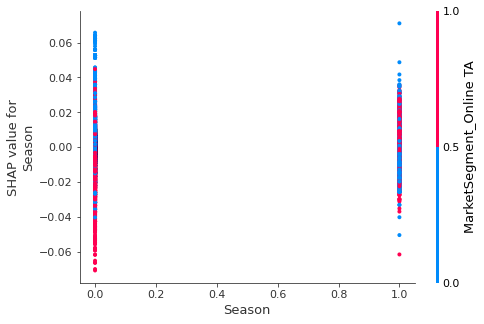

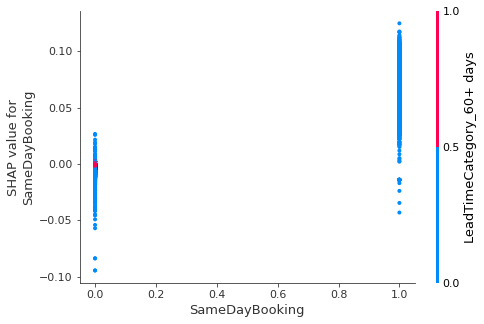

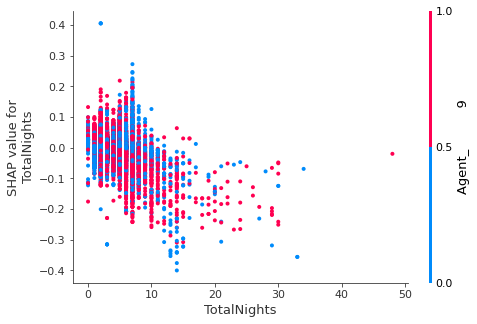

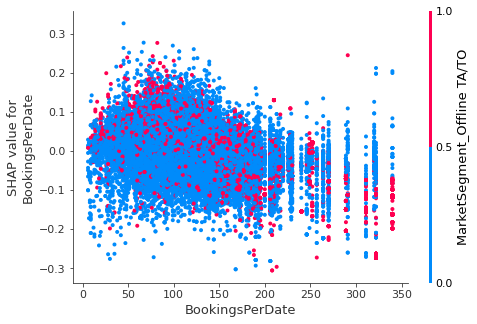

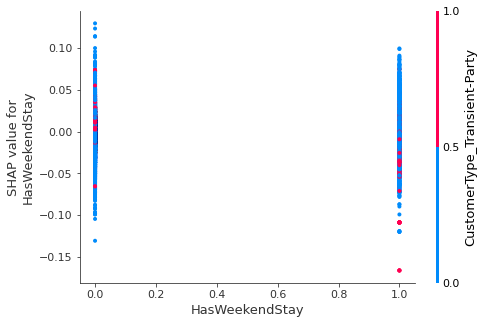

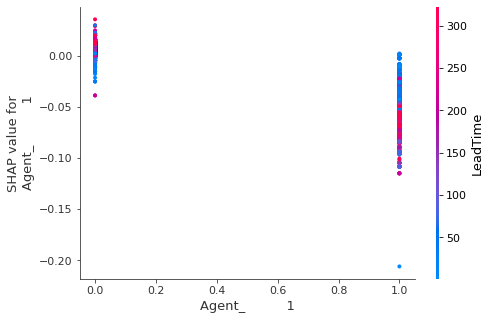

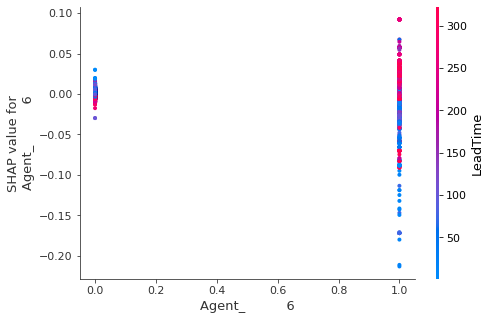

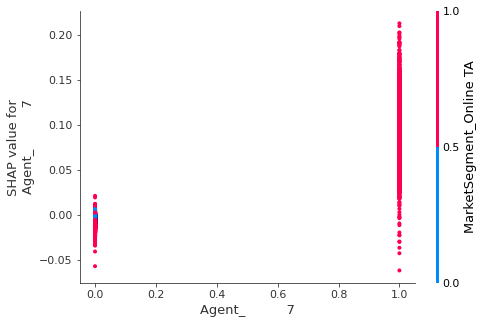

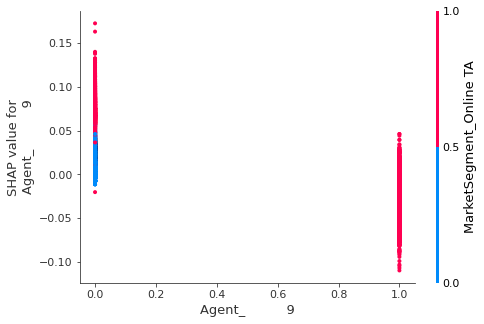

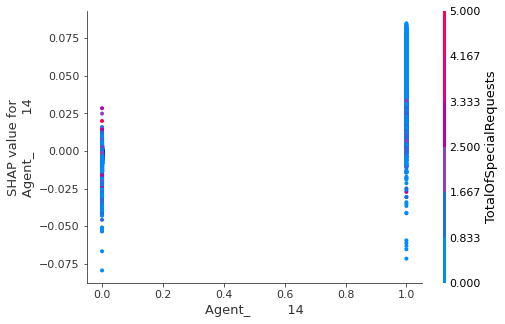

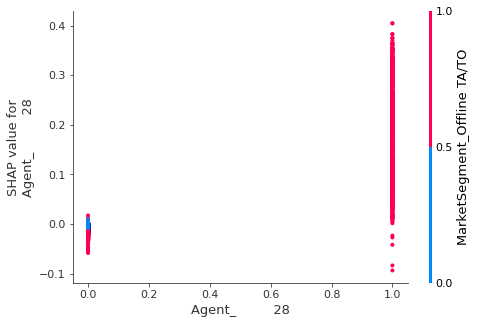

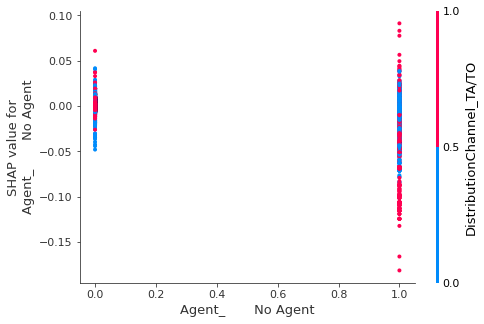

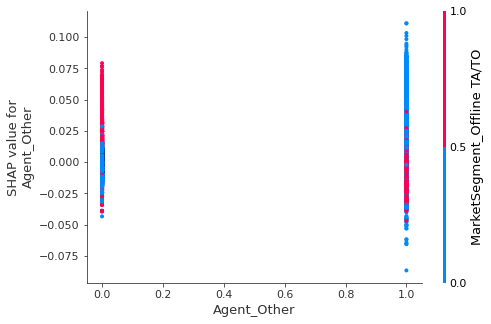

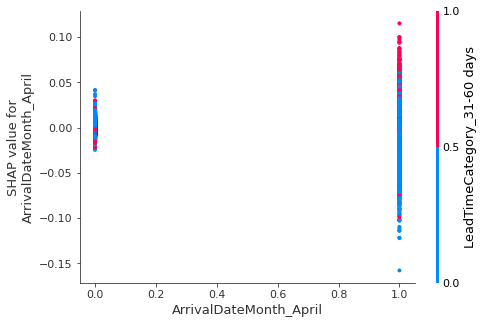

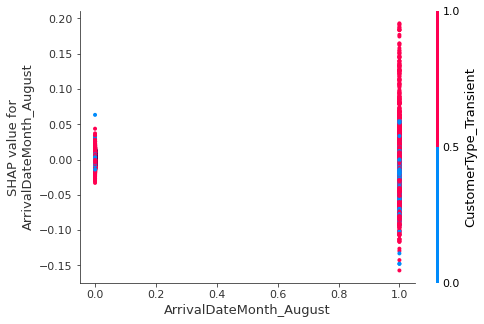

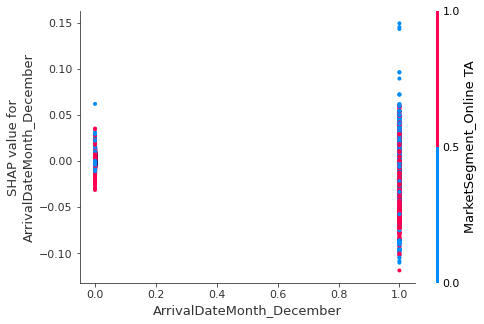

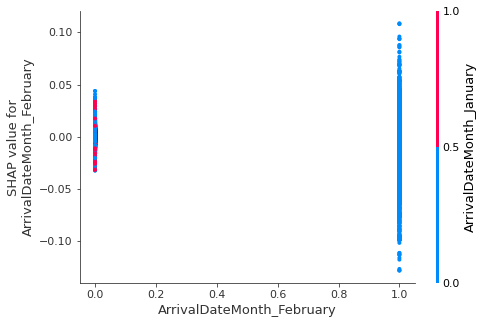

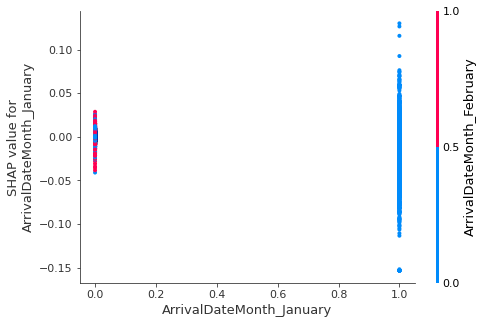

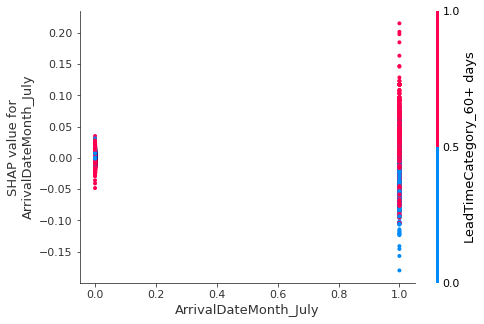

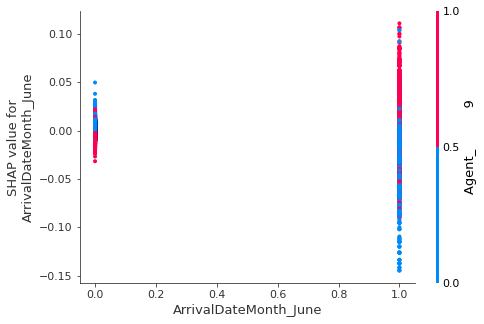

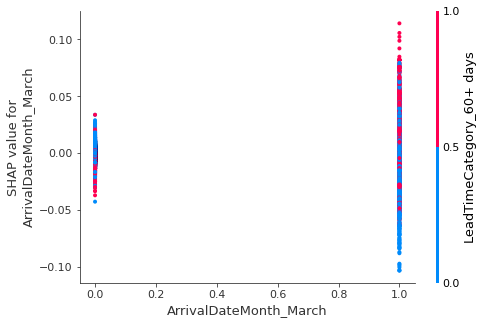

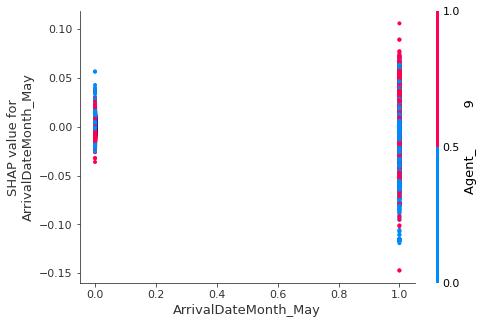

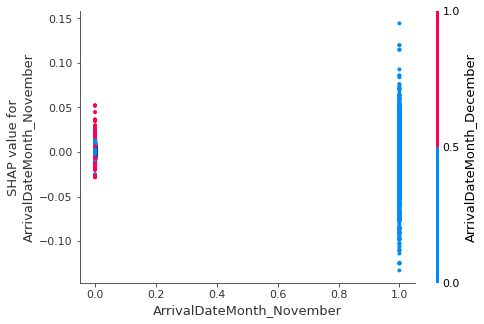

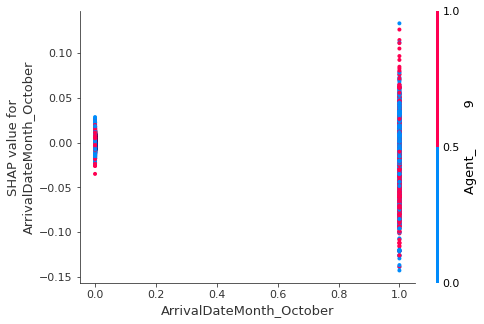

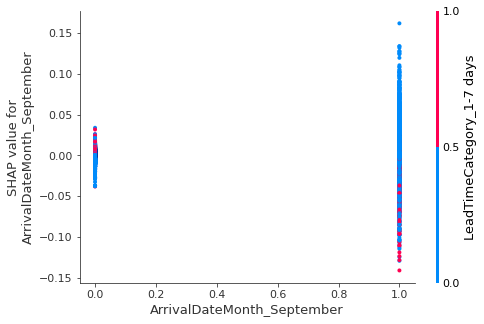

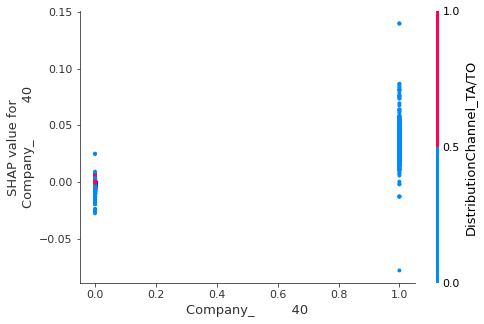

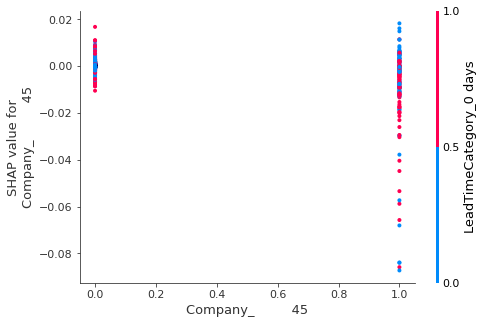

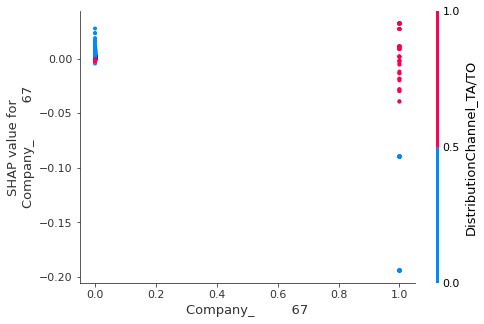

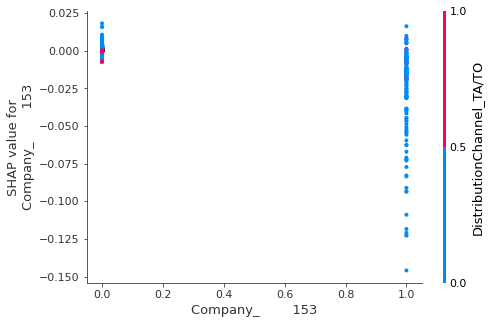

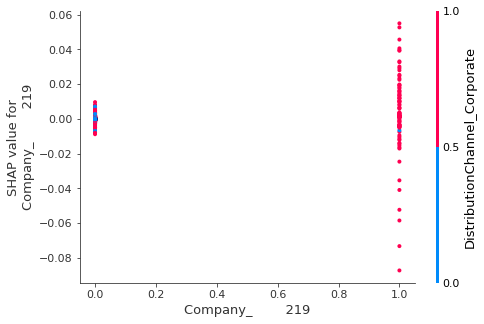

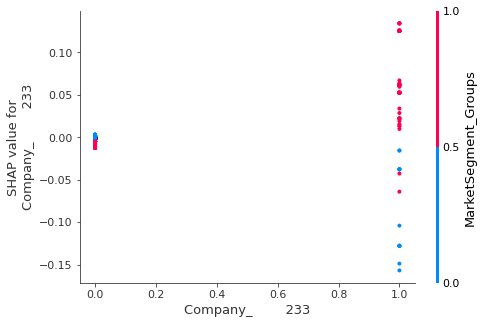

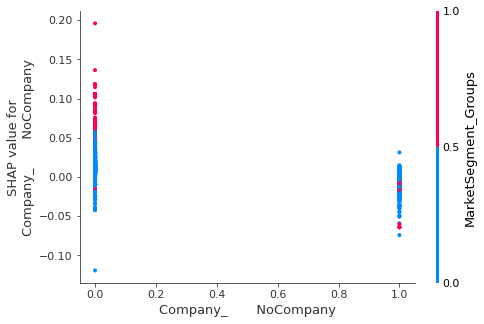

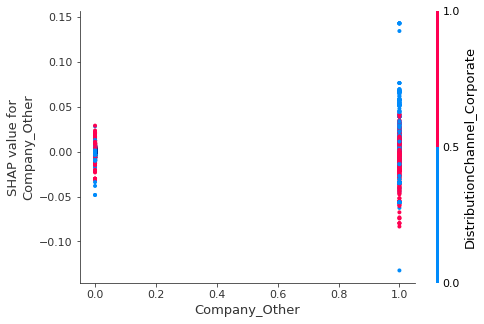

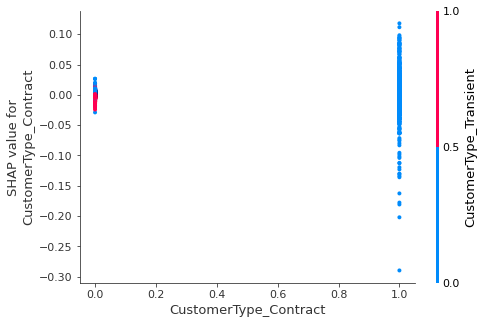

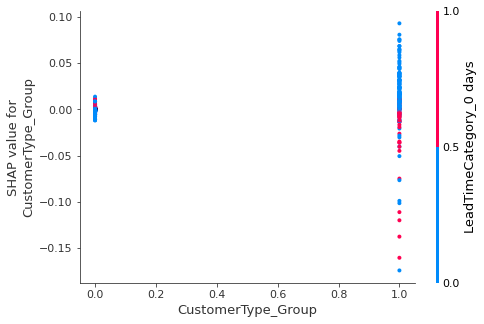

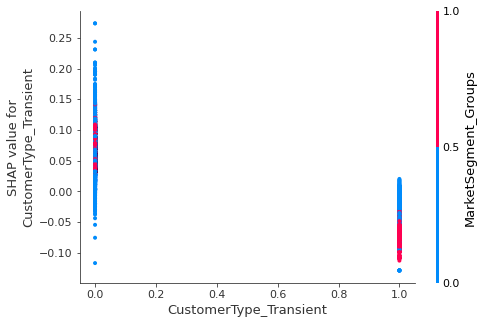

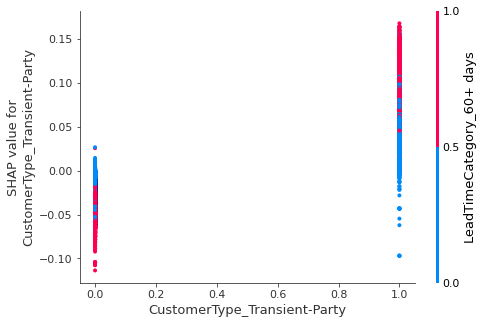

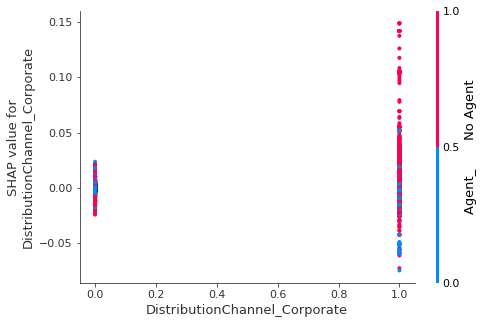

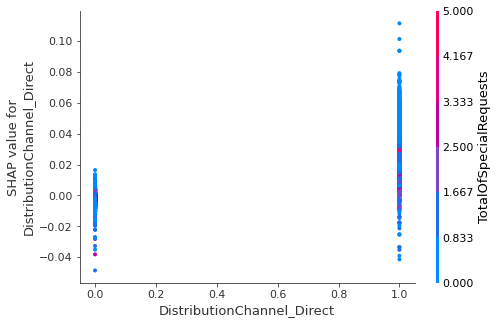

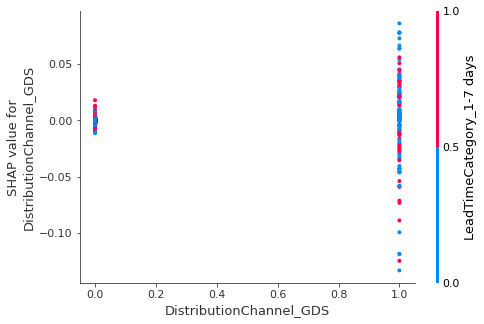

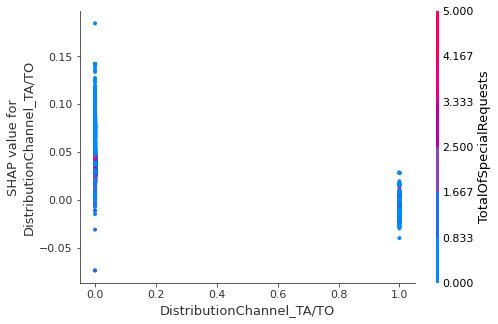

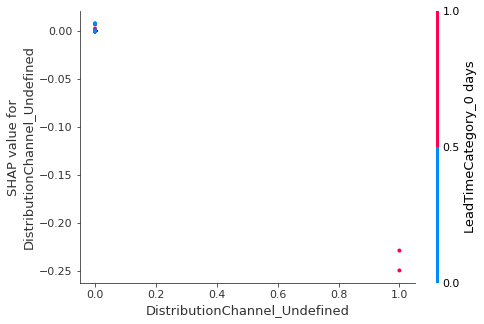

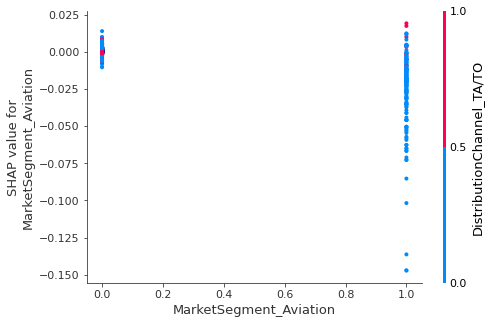

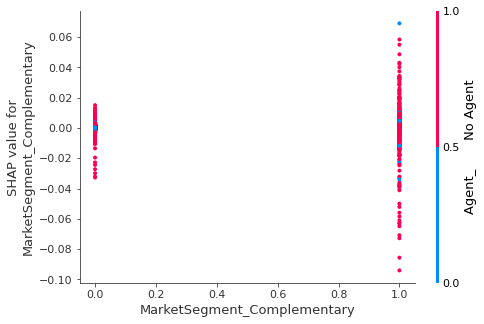

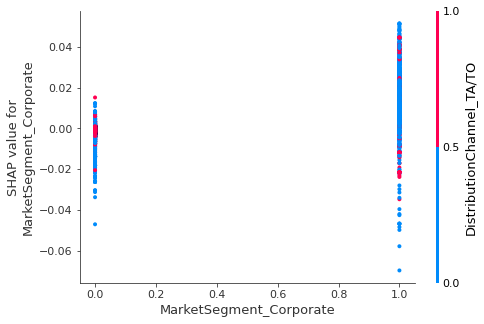

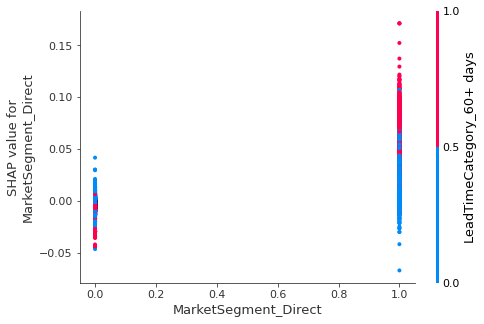

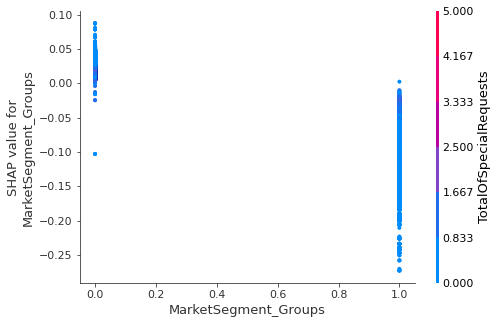

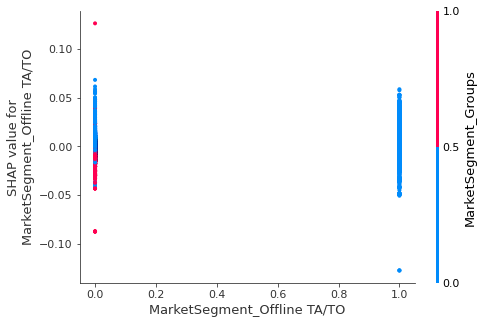

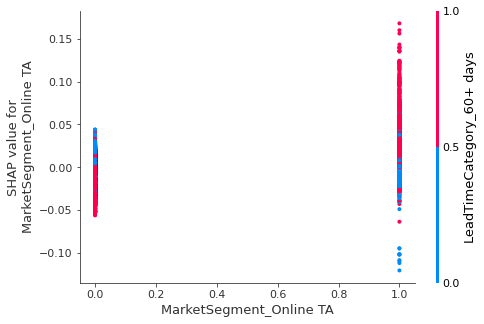

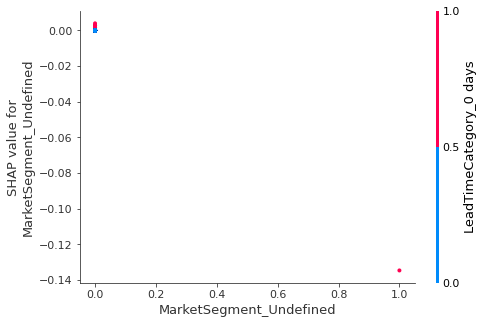

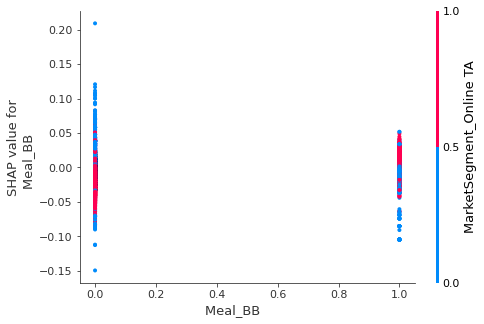

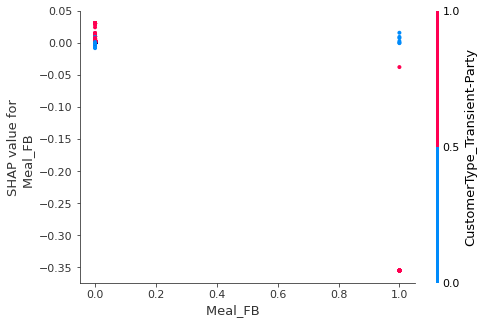

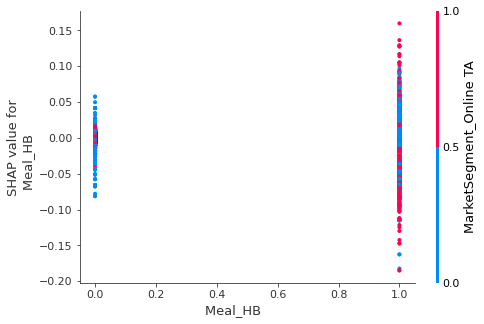

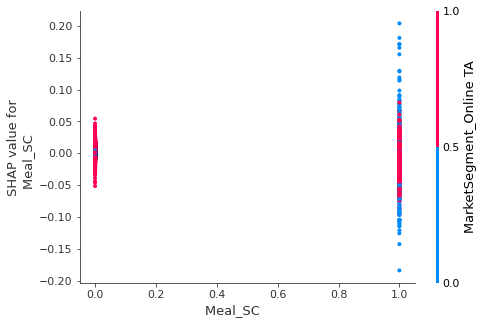

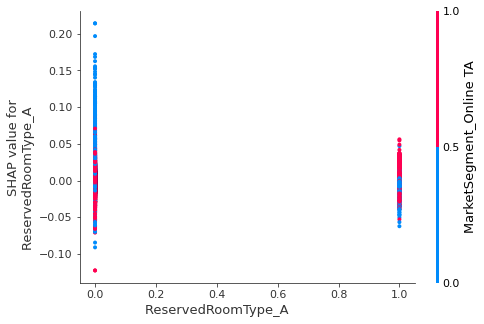

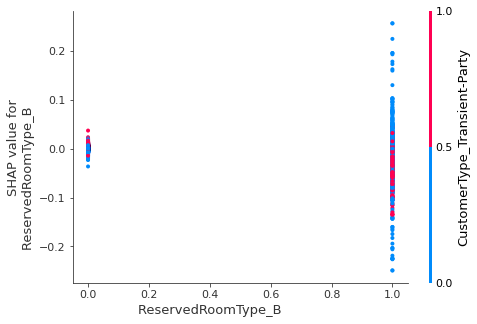

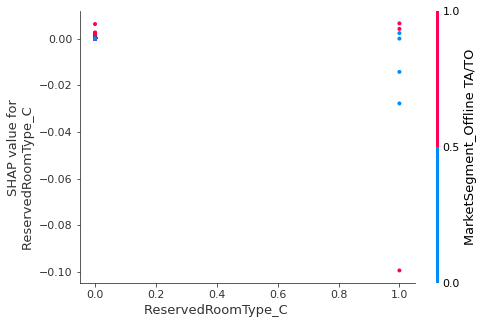

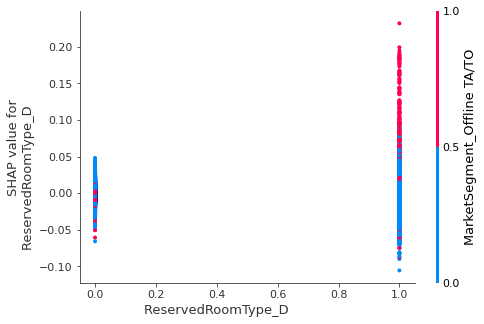

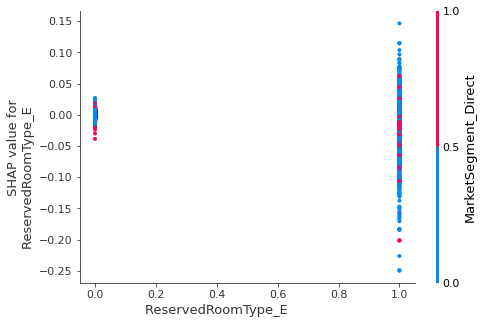

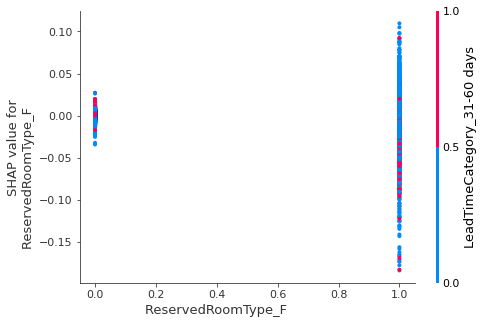

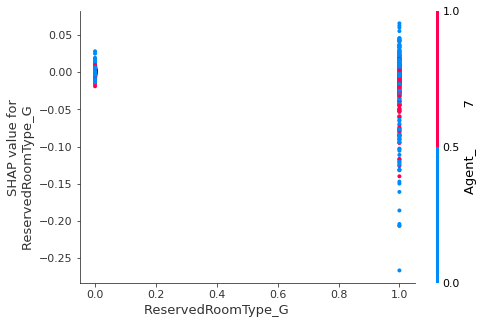

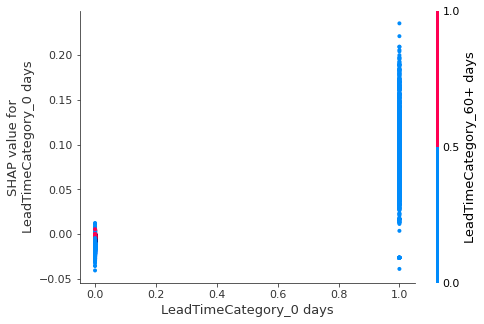

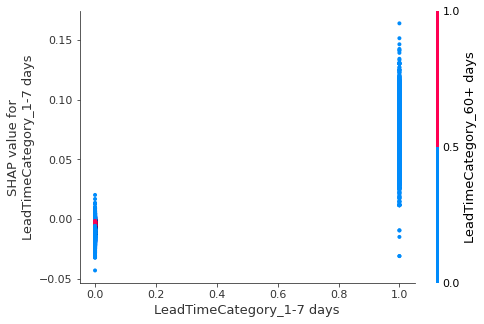

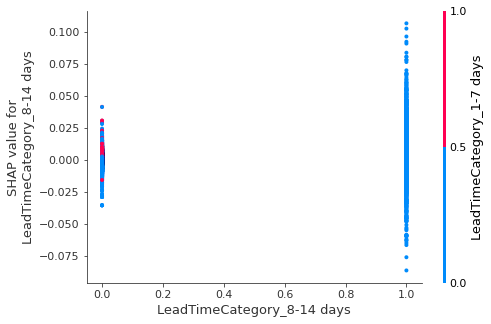

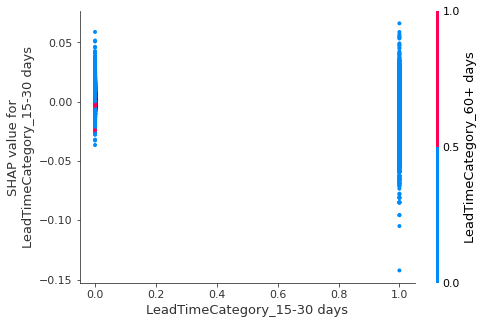

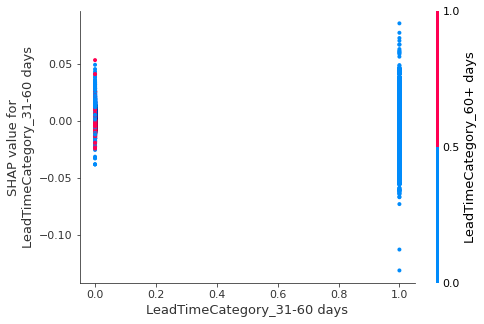

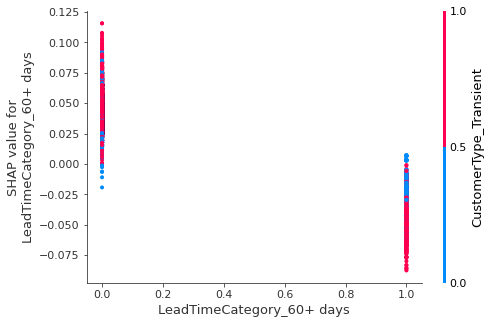

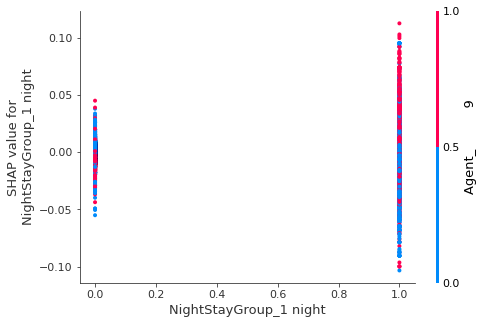

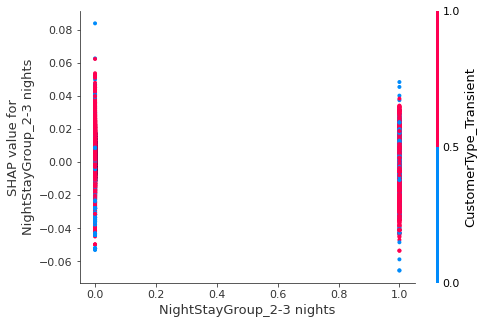

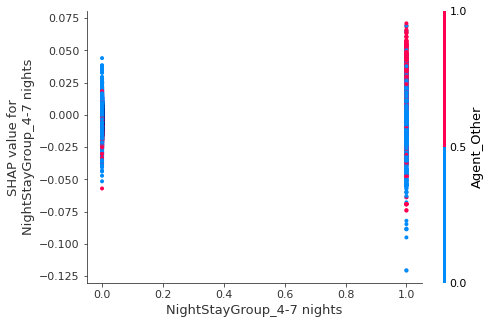

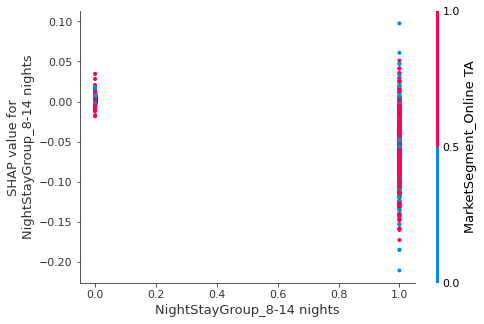

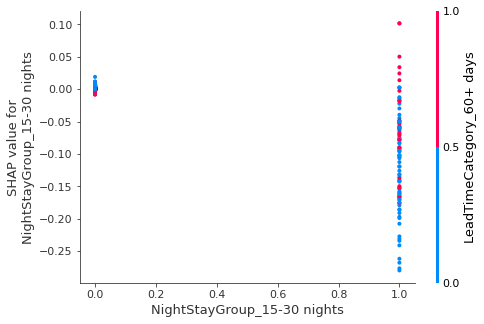

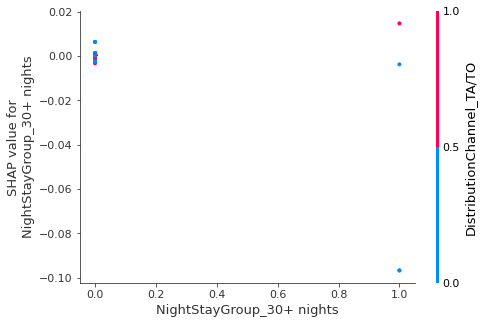

In [152]:
# Check the dependence between the different features
for name in X_train.columns:
    if isinstance(shap_values, list):
        shap.dependence_plot(name, shap_values[0], X_train, display_features=X_train)
    else:
        shap.dependence_plot(name, shap_values, X_train, display_features=X_train)

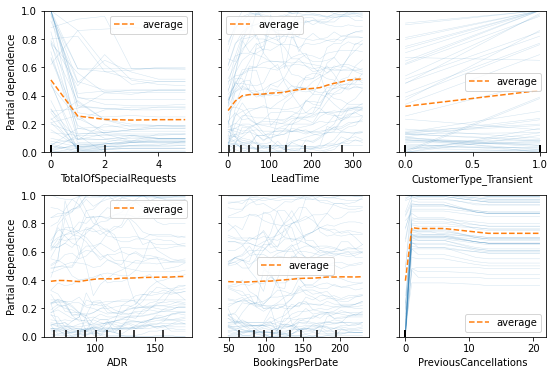

In [153]:
features = ["TotalOfSpecialRequests","LeadTime","CustomerType_Transient","ADR", "BookingsPerDate", "PreviousCancellations"]
fig, ax = plt.subplots(figsize=(9, 6))
display = PartialDependenceDisplay.from_estimator(
    model_rf,
    X_train,
    features,
    kind="both",
    subsample=50,
    n_jobs=3,
    grid_resolution=20,
    random_state=0,
    ice_lines_kw={"color": "tab:blue", "alpha": 0.2, "linewidth": 0.5},
    pd_line_kw={"color": "tab:orange", "linestyle": "--"},
    ax=ax
)
display.figure_.subplots_adjust(hspace=0.3)